In [1]:
cd PycharmProjects/motoki_ul/review_analysis

[Errno 2] No such file or directory: 'PycharmProjects/motoki_ul/review_analysis'
/Users/motoki/PycharmProjects/motoki_ul/review_analysis


In [2]:
vc = df['hashtag'].value_counts()
print(vc)

NameError: name 'df' is not defined

In [29]:
##Clean raw data & prepare for analytics

import pandas as pd

input_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/input_dir/instagram_mixed"
df = pd.read_csv(f"{input_dir}/instagram_raw.csv")
df.fillna("。")

#Replace \n in caption (This causes Attribute error on MeCab)
df_new = df
caption = []
hashtag = "カフェインレス"

for i in df['caption']:
    caption.append(str(i).replace('\n',''))
df_new["caption"] = caption
#print(df_new)

df_new = df_new[df_new["hashtag"].str.contains(hashtag, na=False)]

#Combine comments on each product (for Doc2Vec)
df_new_combined = df_new[~df_new.duplicated(subset='id')]
#df_new_combined = df_new_combined.groupby(["id", "hashtag"])["caption"].sum().reset_index()
#df_new_combined = df_new_combined.groupby(["hashtag"])["caption"].sum().reset_index()
df_new_combined["caption"]
#df_new_combined = df_new.groupby(["id", "hashtag"])["caption"].sum().reset_index()
#df_new_combined.describe

0       【妊婦だって我慢したくない】 premama_sako 👈他の投稿はこちら スタバのカフェイ...
1       ◀フォローお願いします𓍯◀30代のための美容情報💄​꙳✼𓂃𓂃𓂃𓂃𓂃𓂃𓂃𓂃​やめてよかった美容...
2       seika_babymama☜他の投稿を見る👀こんばんは！1歳の男の子育児中のせいかです☺︎...
3       【貧血さんとカフェイン】貧血さん、こんなことない？・胃腸が弱い・過緊張・疲れやすい・不安感が...
4       suzu_mom23 ◀︎ 他の妊娠生活・出産準備レポはこちらから！˗ˏˋ スタバのデカフェ...
                              ...                        
9890    こんにちは🍀はるです😊✨✨窓の外は雨☂️…ですが…小野珈琲焙煎所は、今日も元気に営業中ですよ...
9891    【コーヒーミックス】ブレンディスティック〈カフェオレ　カフェインレス〉#コーヒーミックス #...
9892    .デカフェセットデカフェなので、カフェインを気にせずいつでも飲めます☕️デカフェとは思えない...
9893    .【BAMBI WATER SUMI COFFEE】3種類の国産炭を配合したチャコールクレン...
9894    .夏季休業のお知らせ誠に勝手ながら、下記日程にてお休みとさせていただきます。8月4日(金)、...
Name: caption, Length: 2014, dtype: object

In [7]:
print(text_unlisted)

NameError: name 'text_unlisted' is not defined

<ipython-input-30-1c80121032d1>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["cleared_words"] = df_new["caption"].apply(lambda x : get_dokuritsugo_by_mecab(x))
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/motoki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-30-1c80121032d1>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["cleared_stopwords"] = list(df_new["cleared_words"].apply(lambda x: del_stop_words(x)))
<ipython-input-30-1

        word  count
1500       –   3972
6      カフェイン   3657
37       カフェ   3513
7         レス   2566
327       珈琲   2393
446        豆   1865
178        　   1814
1038       煎   1585
1037       焙   1577
101       好き   1411
221       紅茶   1349
66        ある   1265
235      ティー   1126
39       繋がり   1043
660   coffee   1036
270       販売    898
69      ください    863
331        ☕    847
322        ⁡    801
2012       ゙    792
414       いる    780
448      暮らし    767
70         ✨    707
1172      自家    692
205       する    682
445       おり    670
26        妊娠    651
1364     ハーブ    603
91        あり    588
483      アイス    536


<Figure size 2160x1440 with 0 Axes>

/Users/motoki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/motoki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9749 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/motoki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8289 missing from current font.
  font.set_text(s, 0, flags=flags)


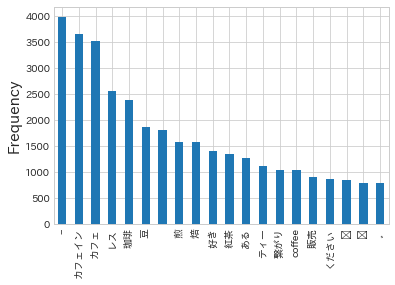

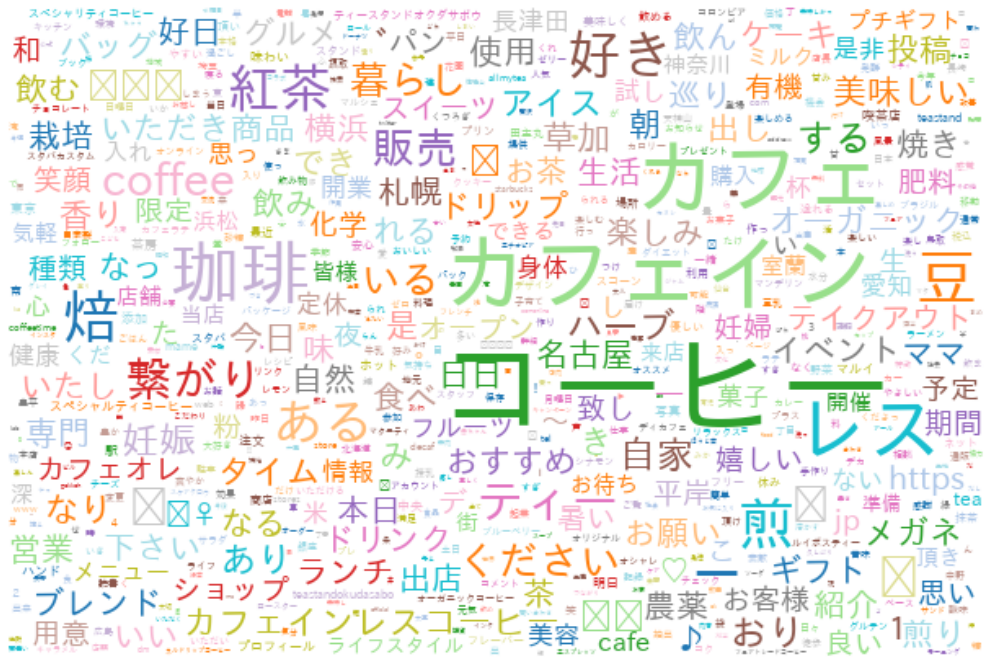

In [30]:
##Split into words and visualize

from sklearn.feature_extraction import stop_words
from collections import Counter, defaultdict
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import MeCab
import sys
import urllib
import nltk
import string
import re
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = "IPAexGothic"

tagger = MeCab.Tagger("/usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
tagger.parse("")

class CustomMeCabTagger(MeCab.Tagger):

    COLUMNS = ["表層形", "品詞", "品詞細分類1", "品詞細分類2", "品詞細分類3", "活用型", "活用形", "原形", "読み", "発音"]

    def parseToDataFrame(self, text: str) -> pd.DataFrame:
        """テキストを parse した結果を Pandas DataFrame として返す"""
        results = []
        #Mecabの出力方式に基づく。(表層系\t品詞,品詞細分類...)
        #まずは改行で分けて単語自体を区分する
        text_unlisted = " ".join([i for item in text for i in item])
        for line in self.parse(text_unlisted).split("\n"):
            #EOS = end of statement, no more words
            if line == "EOS":
                break
            #Split word itself and feature by "tab"
            surface, feature = line.split("\t")
            #Put None if the content is "*" (means nothing)
            feature = [None if f == "*" else f for f in feature.split(",")]
            results.append([surface, *feature])
        return pd.DataFrame(results, columns=type(self).COLUMNS)

def get_dokuritsugo_by_mecab(text):
    tagger = MeCab.Tagger("/usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
    tagger.parse("") 
    node = tagger.parseToNode(text)
    word_list = []
    while node:
        pos = node.feature.split(",")[0]
        #only needs below (others don't have meanings in this context)
        if pos in ["名詞", "動詞", "形容詞"]:
            word = node.surface
            word_list.append(word)
        node = node.next
    return " ".join(word_list)

df_new["cleared_words"] = df_new["caption"].apply(lambda x : get_dokuritsugo_by_mecab(x))
#df_new["cleared_words"]

stop_words_all = []
#define stopword (English)
nltk.download("stopwords")
stop_words_sklearn = stop_words.ENGLISH_STOP_WORDS
stop_words_nltk = nltk.corpus.stopwords.words("english")
stop_words_nltk.extend(stop_words_sklearn)
stop_words_all = stop_words_nltk

#define stopword (Japanese)
slothlib_path = "http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt"
slothlib_file = urllib.request.urlopen(slothlib_path)
slothlib_stopwords = [line.decode("utf-8").strip() for line in slothlib_file]
slothlib_stopwords = [ss for ss in slothlib_stopwords if not ss==u'']
stop_words_all.extend(slothlib_stopwords)

#define manual stopword
add_words=["'",u"それ",u"てる",u"よう",u"こと",u"の",u"し",u"い",u"ん",u"さ",u"て",u"せ",u"れ"]
stop_words_all.extend(add_words)

def del_stop_words(text):
    #replace all the punctuations by using re.sub()
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    sample = regex.sub("", text)
    
    #change to lower case and check if it's in stop words list
    words = [w.lower()  for w in sample.split(" ") \
                 if not w.lower()  in stop_words_all]
    words=" ".join(words)
    return words

def del_single_used_words(text):
    #delete words only used once
    frequency = defaultdict(int)
    for words in text:
        for token in words:
            frequency[token] += 1
    words = [[token for token in words if frequency[token] > 1] for words in text]
    return words

df_new["cleared_stopwords"] = list(df_new["cleared_words"].apply(lambda x: del_stop_words(x)))
text = del_single_used_words([i.split(" ") for i in df_new["cleared_stopwords"]])

##Make combined list for doc2vec (now also used for LDA&word2Vec)
df_new_combined["cleared_words"] = df_new_combined["caption"].apply(lambda x : get_dokuritsugo_by_mecab(x))
df_new_combined["cleared_stopwords"]=list(df_new_combined["cleared_words"].apply(lambda x: del_stop_words(x)))
text_combined = del_single_used_words([i.split(" ") for i in df_new_combined["cleared_stopwords"]])

#finally make dataframe of wordlist splitted by MeCab
tagger = CustomMeCabTagger()
result = tagger.parseToDataFrame(text_combined)

counter_list = []
for i in result["表層形"]:
    counter_list.append(i)
word_count = Counter(counter_list)

df_count = pd.DataFrame.from_dict(word_count,orient='index').reset_index()
df_count.columns=["word","count"]
df_count.sort_values("count",ascending=False,inplace=True)
df_count = df_count.iloc[1:,:]

print(df_count.head(30))

#Visualization for word count graph
plt.figure(figsize = (30,20))
ax=df_count.iloc[:20,:].plot.bar()
ax.set_ylabel("Frequency",fontsize=15)
ax.set_xticklabels(
    df_count.iloc[:20,:]["word"], fontdict = {
        'fontsize':10})
ax.legend_.remove()
plt.style.use('seaborn-whitegrid')
plt.show()

fpath = "/Users/motoki/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
#Visualization for word cloud
wc_bz = WordCloud(
    background_color="white",
    width=600,
    height=400,
    max_words=3000,
    max_font_size=70,
    font_path=fpath,
    prefer_horizontal=1,
    include_numbers=True,
    colormap='tab20',
    regexp=r"[\w']+")
wc_bz.generate_from_frequencies(word_count)

plt.figure(figsize = (21,12))
#sns.set_style("whitegrid")
plt.imshow(wc_bz, interpolation="bilinear")
plt.axis("off")
plt.style.use('seaborn-whitegrid')
plt.show()

In [84]:
import pandas as pd

npjp = pd.read_csv("npdict.txt", sep=":", names=('Word','Pronunciation','Type', 'Score'))

words = npjp["Word"]
scores = npjp["Score"]

npjp_dic = dict(zip(words, scores))

pnscore = []
pnjudge = []

tagger = CustomMeCabTagger()

for string in df_new_combined["cleared_stopwords"] :
    mecab = tagger.parse(string)
    
    #mecab = tagger.parse(string)
    kaigyou = mecab.splitlines()
    
    npscore = 0
    count = 0
    for tango_list in kaigyou:
        tab = tango_list.split('\t')
        #print(tab)
        if tab[0] in npjp_dic:
            pn_score = npjp_dic[tab[0]]
            npscore += pn_score
            count += 1
        else:
            pass
            #print('辞書に単語がないです')
        #print(pn_score)
    if count==0:
        pnscore.append(0)
        pnjudge.append(0)
    else:
        string_score = npscore/count
        pnscore.append(string_score)
        if string_score > -0.4:
            pnjudge.append("p")
        else:
            pnjudge.append("n")
    
    #print("=====")
#print(pnscore)

df_np = pd.DataFrame()
df_np["Caption"] = df_new_combined["caption"]
df_np["np"] = pnscore
df_np["judge"] = pnjudge

df_sort = df_np.sort_values('np', ascending=True)
display(df_sort.head(30))


# output to csv

import datetime

now = datetime.datetime.today()
today = now.strftime("%Y%m%d")
category = "tea"

output_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/output_dir/instagram_mixed"
filename = f"{today}_{category}_npcheck.csv"
df_sort.to_csv(f"{output_dir}/{filename}")


Caption        np judge
376                                  𓈒𓏸◌たまれんで海ピクした時✌️🏻🏖 -0.958041     n
1361  サワーチェリーのフィナンシェ🍒キルシュで香りづけ🥃カリッジュワ〜🍃焼いて10分後がいちばんす... -0.841705     n
378   💄💄💄﻿﻿﻿﻿﻿マルコポーロルージュ☕️﻿ノンカフェインだから夜寝る前の一杯にほっと出来るお... -0.686665     n
21    雨は降ってないけど蒸し暑めの岡山市です。久しぶりにルイボスティーをいただきました。日本茶製法... -0.648043     n
1348  🍓『マリトッツォ』ふわふわの丸パンにぽってりぽよよんな生クリームたんまりいちごをむぎゅっとつ... -0.647536     n
6     ルイボスティーには他のお茶類と比較して重要なミネラルであるマグネシウム含有が多いことがわかっ... -0.647244     n
1382       𓊱  バタートースト#朝ごはん　#バタートースト　#ルイボスティー　#器　#朝　#暮らし -0.645568     n
140   GODIVAの期間限定の、この2種類のドリンク美味しそう♡♡気になるのは、左の方🎶左のは📸あ... -0.641920     n
1308  しめ縄みたいな頭して。今日はものすごい寒いので久しぶりにマシュマロに包まれました⚪️🟤🟠明日... -0.637276     n
129   ＊朝ごぱん＊ごはんパン朝に食べるスープルイボスティー・・（オバサンだけど）女の子の日3日目。... -0.625967     n
1477  .■ポークソテーのマスタードクリームソース（レシピメモあり）■サーモンのカルパッチョ... -0.621929     n
1142  イザベルボワノさんのレシピでトラディショナルなスコーン📖狼の口ぱっかーん👏🏻起き抜けにさくっ... -0.621014     n
19    ・今日は雨が降ったり止んだり変なお天気だったねぇ。。さてと、夜は薬膳鍋食べるよ🫕🥕この日もカ... -0.617916     n
364   お茶の葉購入🍵#パレデテ #ルイボスティー#台湾烏龍茶 #パリでお買い物#パリ散歩#... -0.613318     n
126   ネットで話題になっているセリアの手ぬぐい風タオルを買ってきました〜🐨マリメッコのプケッティに... -0.608539     n
35    .花粉症が酷くて、せっせとルイボスティー飲んでます☕️.#ルイボスティー#花粉症#ミ... -0.600269     n
1145  最近ずっと肌がいい感じ！そのお陰はlbalancia エルバランシアのRBモイストリッチクリ... -0.594768     n
531   【#GODIVA】ほっ♡息抜き.(注文)#ショコリキサーホワイトチョコレートルイボスティー6... -0.594211     n
1393  今日の晩御飯😋〜タンパク質と野菜🍅🥒🥬に大麦〜宮崎鶏のムネ肉の焼き鳥トマト胡瓜サニーレタスの... -0.591381     n
157   ..私のトレ中のドリンクはルイボスティーか麦茶がメインです😙理由はゴクゴクたくさん飲めるから... -0.588709     n
2146  久しぶりのカレーライス🥄定期的に食べたくなっちゃいます₍₍ ( ๑॔˃̶◡ ˂̶๑॓)◞♡🍛... -0.584584     n
508   脂っこいお料理には、もはや私の中で欠かせないルイボスティー♪こちらはルイボスティーの中でも、... -0.581607     n
1475  子がくれたティーバックが可愛すぎた。#ルイボスティー#うさぎ#teabag #母の日#gon... -0.575073     n
2142  おはようございます(Ő‿Ő♥)⁣・⁣・⁣今朝は春キャベツを使った朝ご飯です♡⁣... -0.569231     n
1349  ⚐ﾞ たかの巣カフェ / 広島　福山﻿﻿﻿前に行ったランチ‪𖠚ᐝ﻿色々味が楽しめた𓂃﻿﻿﻿﻿... -0.568344     n
1110  季節のパンケーキ🥞さくら🌸さくら🌸#北海道 #札幌市 #北区 #anycafe #季節のパン... -0.564749     n
1449  .着色がつきやすい飲食物の質問に答えてくださった方ありがとうございます♪.さて、集計結果から... -0.561573     n
29    *2021/04/20お家🏠で #冷茶 🍵を飲む時用の #ボトル でする😊💕#お気に入り な... -0.560210     n
1303  寒い日には紅茶で温まります🫖#🫖タイムを是非#ルイボスティー #ラズベリー#ローズ... -0.559341     n
1495           MUJI  芋類寄せ集めプレートになっちゃったから次は野菜を一つは選ぼうと🥔 -0.556232     n

count    499.000000
mean      -0.356620
std        0.142583
min       -0.958041
25%       -0.444627
50%       -0.368822
75%       -0.280286
max        0.190762
Name: np, dtype: float64

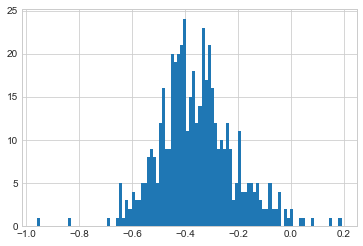

In [91]:
import numpy as np
import matplotlib.pyplot as plt

x = df_np["np"]
plt.hist(x, bins=100)

x.describe()

In [19]:
# word frequency output to csv

import datetime

now = datetime.datetime.today()
today = now.strftime("%Y%m%d")
category = "tea"

output_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/output_dir/instagram_mixed"
filename = f"{today}_{hashtag}_instagram.csv"
df_count.to_csv(f"{output_dir}/{filename}")

df_count

word  count
58     ティー   4743
62     カフェ   2024
156      　   1903
114     ある   1411
250     好き   1079
...    ...    ...
12051  イヤー      1
5841     円      1
13300    方      1
7693    がら      1
13246    集      1

[13430 rows x 2 columns]

In [110]:
##TF-IDF analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

df_new_combined["cleared_words"] = df_new_combined["caption"].apply(lambda x : get_dokuritsugo_by_mecab(x))
df_new_combined["cleared_stopwords"] = df_new_combined["cleared_words"].apply(lambda x: del_stop_words(x))
text_combined_tfidf = [i for i in df_new_combined["cleared_stopwords"]]

vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(text_combined_tfidf)
X=X.toarray()

idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
df_idf = pd.DataFrame(columns=['idf']).from_dict(
                    dict(idf), orient='index')
df_idf.columns = ['idf']
display(df_idf.sort_values("idf").head(10).T)

ルイボスティー        好き       カフェ       ティー        お茶     カフェイン        ある  \
idf  1.225647  1.951918  2.096614  2.251763  2.265848  2.354796  2.410587   

           紅茶        いる     美味しい  
idf  2.560648  2.629641  2.65026

In [111]:
##t-SNE for TF-IDF
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2, verbose=1, n_iter=500)
tsne_tfidf = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 499 samples in 0.106s...
[t-SNE] Computed neighbors for 499 samples in 2.687s...
[t-SNE] Computed conditional probabilities for sample 499 / 499
[t-SNE] Mean sigma: 0.265870
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.000626
[t-SNE] KL divergence after 500 iterations: 1.425384


In [113]:
#Put in DataFrame
df_tsne = pd.DataFrame(tsne_tfidf[:,0],columns = ["x"])
df_tsne["y"] = pd.DataFrame(tsne_tfidf[:,1])
df_tsne["id"]=df_new_combined.id  
df_tsne["hashtag"]=df_new_combined.hashtag

pd.set_option('display.max_rows', 1000)
display(df_tsne.head(10))

x          y                 id  hashtag
0  37.782017 -52.768021  17842330955604797  ルイボスティー
1 -26.983284  11.614927  17844850019598965  ルイボスティー
2  -5.310116   6.617049  17845466726519190  ルイボスティー
3  31.324865  -9.541160  17846089826526605  ルイボスティー
4  10.763801 -20.187702  17846148323612742  ルイボスティー
5  22.252956  -1.945845  17847517487578241  ルイボスティー
6  -3.998441  10.918924  17848690841532373  ルイボスティー
7  -1.994457  13.534575  17849389079518786  ルイボスティー
8  26.993509   0.317667  17849547254516155  ルイボスティー
9   6.783212 -14.940793  17850795761517728  ルイボスティー

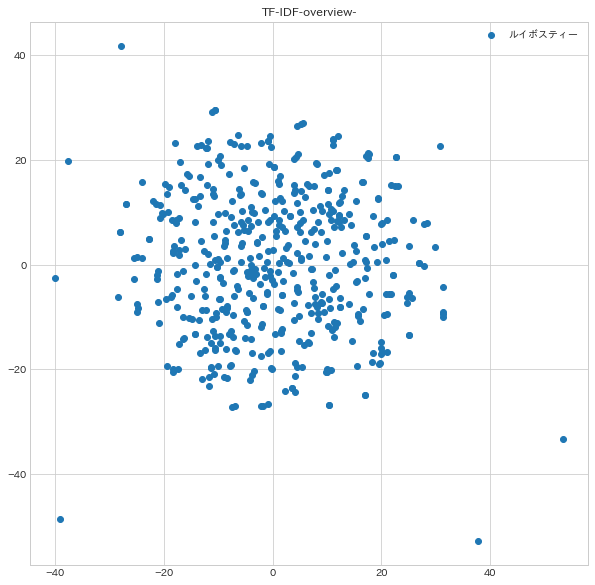

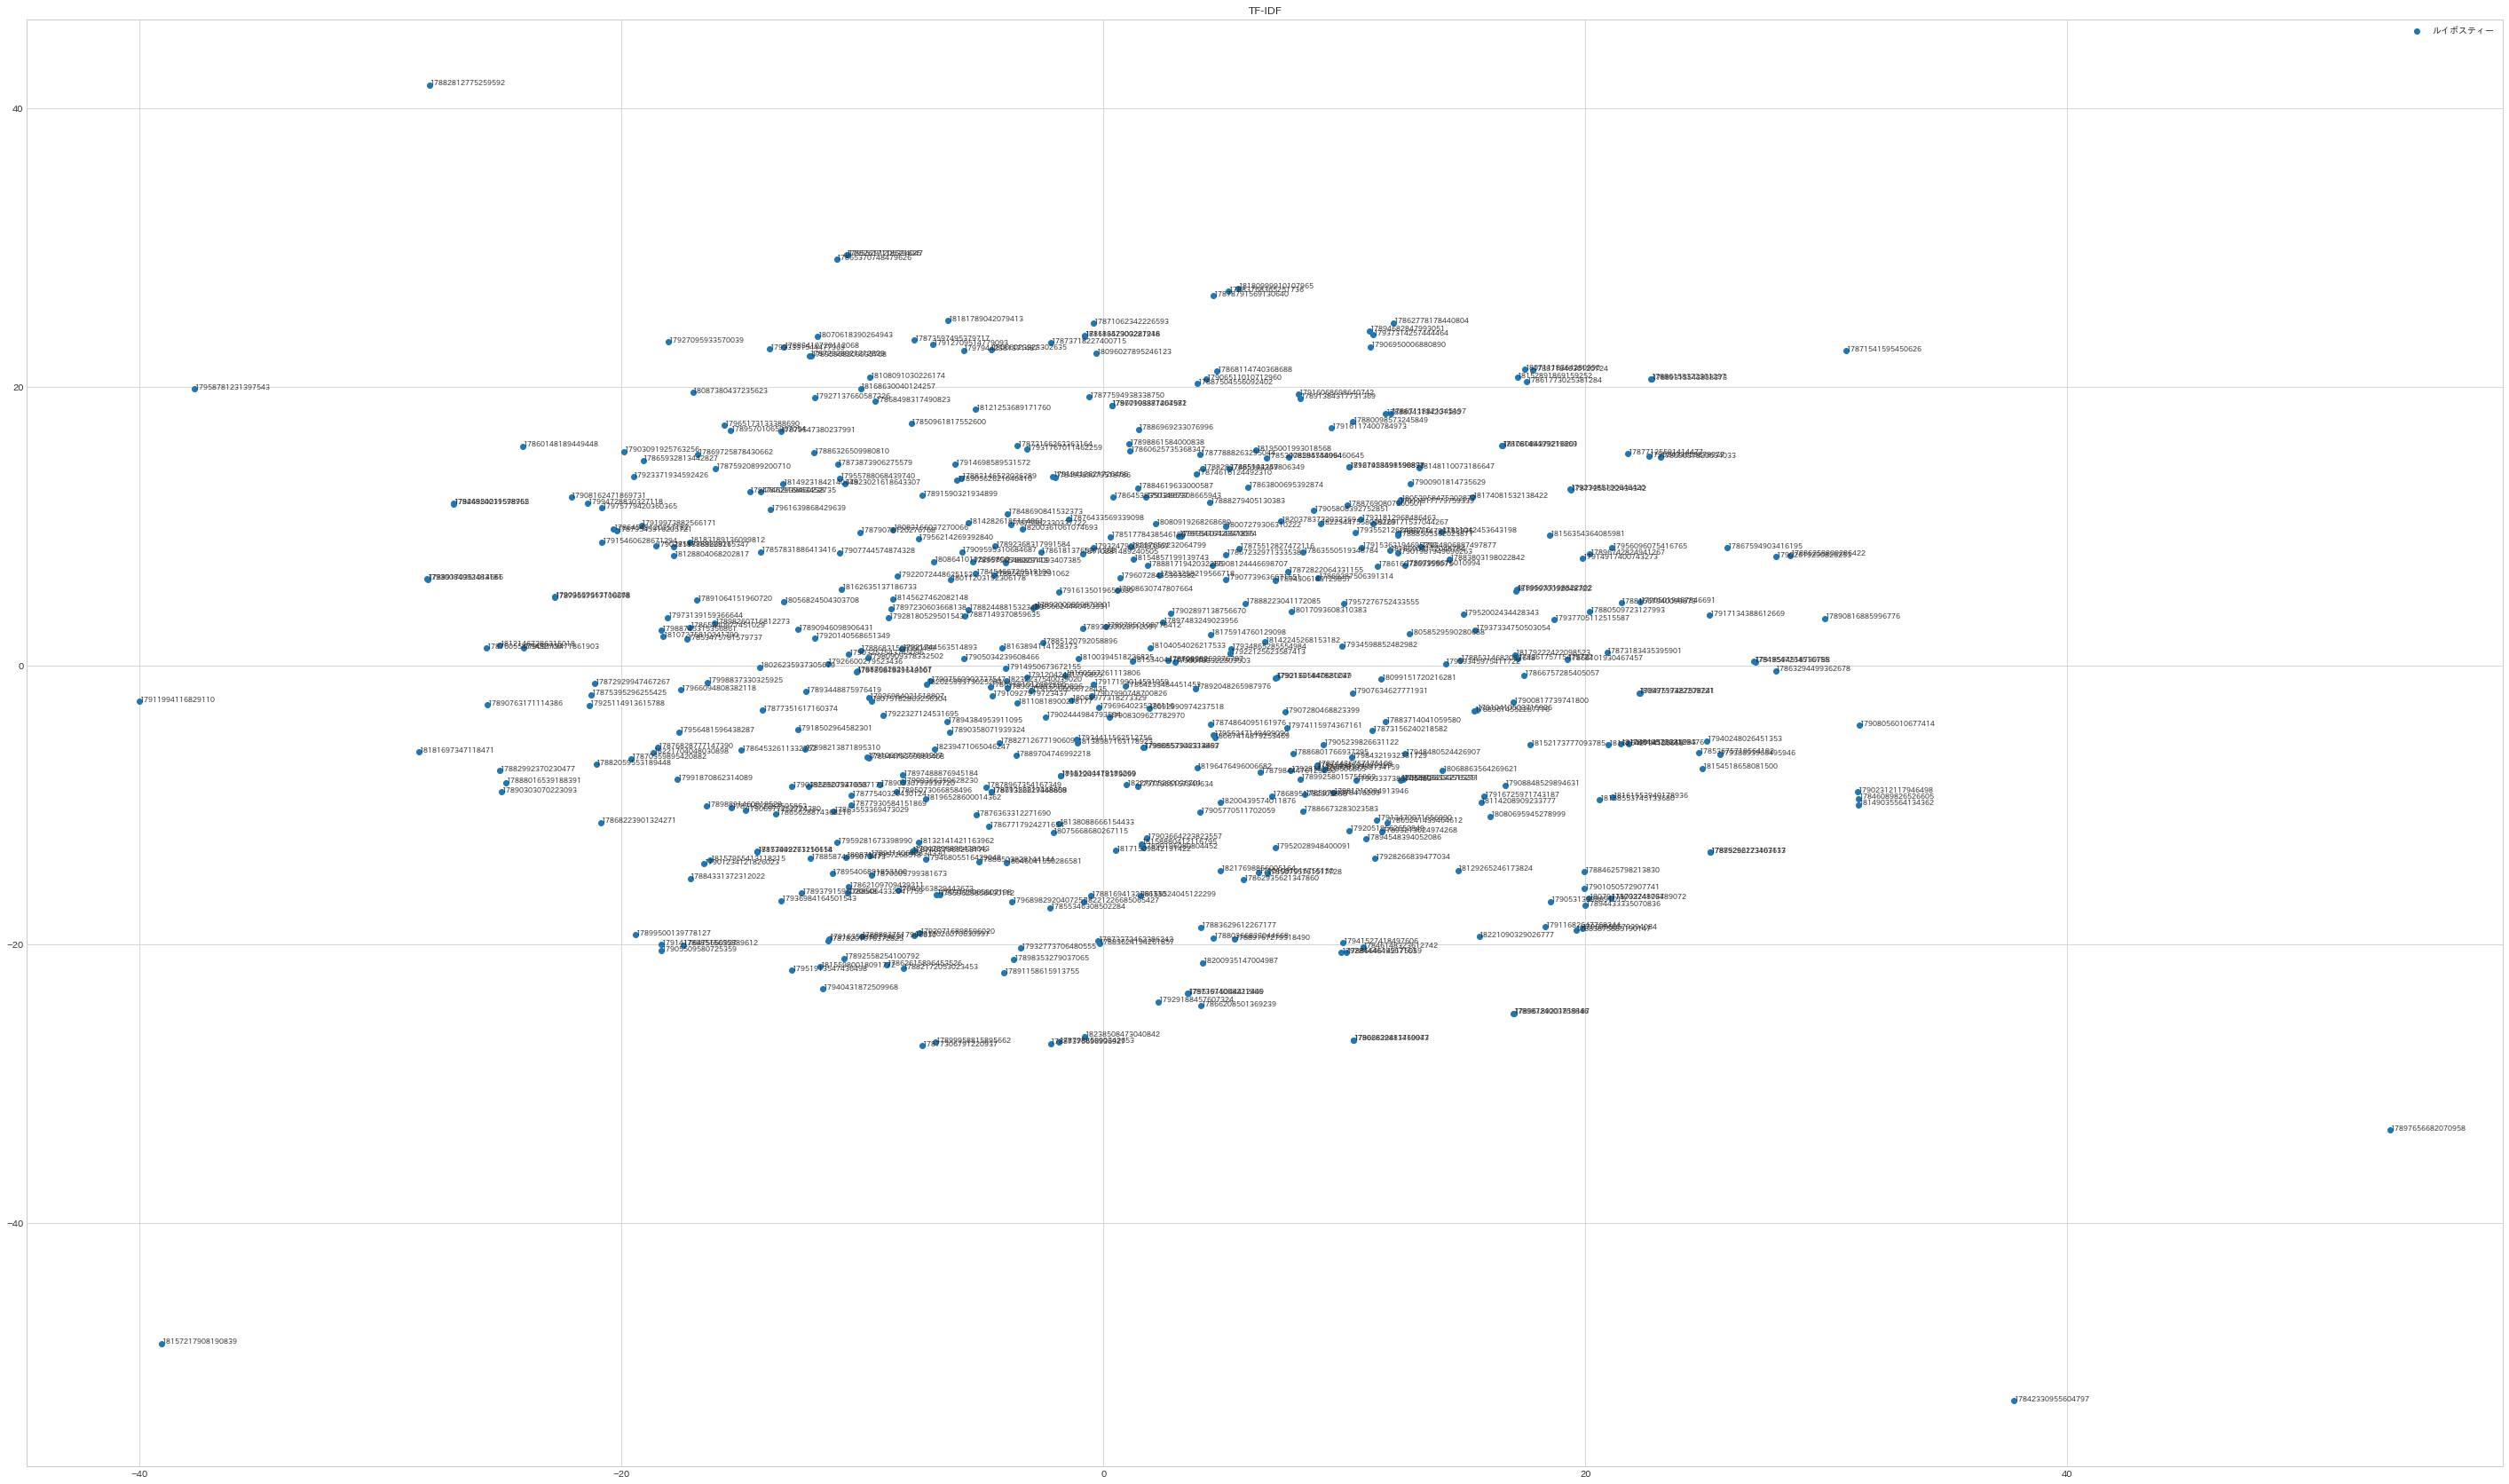

In [116]:
##Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'IPAexGothic'

#A: Overlook
fig_overview = plt.figure(figsize=(10.0, 10.0))
for f in df_tsne['hashtag'].unique():
    plt.scatter(df_tsne.loc[df_tsne.hashtag == f ,'x'], df_tsne.loc[df_tsne.hashtag == f ,'y'], label=f)

plt.legend()
plt.title("TF-IDF-overview-")
plt.show()

#B: Detail
fig_detail = plt.figure(figsize=(50.0, 30.0))
for f in df_tsne['hashtag'].unique():
    plt.scatter(df_tsne.loc[df_tsne.hashtag== f ,'x'], df_tsne.loc[df_tsne.hashtag == f ,'y'], label=f)

for i, txt in enumerate(df_tsne["id"].values):
    plt.annotate(txt, (df_tsne["x"].values[i], df_tsne["y"].values[i]), fontsize=8)
    
plt.legend()
plt.title("TF-IDF")
plt.show()

In [117]:
##LDA analytics (after filtering TF-IDF)

import gensim
from gensim import corpora, models

#Dictionary is the set of "word ID, word, frequency" data (can be saved)
dictionary =corpora.Dictionary(text)
corpus = [dictionary.doc2bow(doc) for doc in text_combined]

#Can filter TF-IDF before LDA
#TF = Term Frequency -> frequency of each word (the bigger, the more important)
#IDF = Inverse document frequency -> filtering too high frequent words like "a, the, there etc.."
#Below is the class for TF-IDF analytics
#tfidf = gensim.models.TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]

#Number of topics
zk = 10
#Learning model (can be saved)
lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary,
                             num_topics=zk, minimum_probability=0.001,
                             passes=20, update_every=0, chunksize=10000)

for i in range(zk):
    print('tpc_{0}: {1}'.format(i, lda.print_topic(i)[0:80]+'...'))

tpc_0: 0.074*"　" + 0.060*"" + 0.018*"⭐" + 0.014*"ごはん" + 0.012*"ルイボスティー" + 0.010*"する" + ...
tpc_1: 0.146*"" + 0.040*"ルイボスティー" + 0.015*"オーガニック" + 0.014*"゙" + 0.012*"カフェイン" + 0.010*...
tpc_2: 0.156*"" + 0.120*"゙" + 0.025*"ルイホ" + 0.023*"スティー" + 0.017*"゚" + 0.008*"ー" + 0.00...
tpc_3: 0.108*"" + 0.023*"ルイボスティー" + 0.012*"紅茶" + 0.008*"お茶" + 0.008*"☀" + 0.008*"ティー" +...
tpc_4: 0.216*"" + 0.037*"゙" + 0.029*"カフェ" + 0.008*"cafe" + 0.008*"ルイボスティー" + 0.006*"ランチ...
tpc_5: 0.121*"" + 0.020*"ティー" + 0.017*"ルイボスティー" + 0.015*"ハーブ" + 0.015*"⠀" + 0.012*"お茶" ...
tpc_6: 0.288*"" + 0.018*"ルイボスティー" + 0.011*"紅茶" + 0.010*"カフェ" + 0.010*"好き" + 0.009*"ティー"...
tpc_7: 0.245*"" + 0.028*"゙" + 0.018*"カフェ" + 0.010*"゚" + 0.009*"ルイボスティー" + 0.007*"好き" + ...
tpc_8: 0.187*"" + 0.014*"ルイボスティー" + 0.008*"日常" + 0.008*"７" + 0.007*"゙" + 0.006*"ティー" + ...
tpc_9: 0.170*"" + 0.020*"ルイボスティー" + 0.011*"かき氷" + 0.007*"食べ" + 0.007*"アトピー" + 0.007*"カフ...


id    Prob_1    Prob_2    Prob_3    Prob_4    Prob_5  \
0   17842330955604797  0.000047  0.000047  0.000047  0.000047  0.999574   
1   17844850019598965  0.000328  0.000328  0.000328  0.000328  0.000328   
2   17845466726519190  0.000813  0.000813  0.000813  0.067301  0.000813   
3   17846089826526605  0.000302  0.000302  0.000302  0.000302  0.000302   
4   17846148323612742  0.000415  0.000415  0.000415  0.000415  0.000415   
5   17847517487578241  0.000422  0.000422  0.000422  0.000422  0.000422   
6   17848690841532373  0.000346  0.253253  0.000346  0.000346  0.743978   
7   17849389079518786  0.000256  0.000256  0.000256  0.997698  0.000256   
8   17849547254516155  0.000094  0.000094  0.000094  0.000094  0.999155   
9   17850795761517728  0.098459  0.000878  0.703683  0.000878  0.000878   
10  17850961817552600  0.066726  0.001337  0.001336  0.001336  0.001337   
11  17851778438546185  0.000207  0.506870  0.000207  0.193284  0.011650   
12  17852617118521625  0.000508  0.000508  0.000508  0.000508  0.000508   
13  17853008285554964  0.000093  0.000093  0.000093  0.000093  0.000093   
14  17853475781579737  0.000156  0.000156  0.000156  0.000156  0.000156   
15  17853675719564192  0.000089  0.000089  0.000089  0.000089  0.000089   
16  17855346308502284  0.000814  0.000814  0.000814  0.000814  0.000814   
17  17856624440453931  0.001125  0.001125  0.001125  0.001126  0.001126   
18  17857831886413416  0.044122  0.000518  0.000518  0.000518  0.000518   
19  17859037820534033  0.000192  0.000192  0.000192  0.000192  0.000192   
20  17859474809460645  0.000091  0.000091  0.999179  0.000091  0.000091   
21  17859764078418203  0.000053  0.000053  0.999521  0.000053  0.000053   
22  17860148189449448  0.001235  0.001235  0.988882  0.001235  0.001235   
23  17860625735368347  0.000106  0.000106  0.000106  0.999047  0.000106   
24  17861607269355075  0.000184  0.998348  0.000184  0.000184  0.000184   
25  17861773025381284  0.000041  0.000041  0.538575  0.000041  0.000041   
26  17861813765371368  0.000127  0.000127  0.000127  0.000127  0.000127   
27  17862109709429211  0.000429  0.000429  0.000429  0.000429  0.083618   
28  17862615896453526  0.000247  0.000247  0.783613  0.000247  0.214411   
29  17862629483419973  0.000252  0.000252  0.737569  0.260414  0.000252   

      Prob_6    Prob_7    Prob_8    Prob_9   Prob_10  Max  
0   0.000047  0.000047  0.000047  0.000047  0.000047    5  
1   0.034039  0.963336  0.000328  0.000328  0.000328    7  
2   0.926192  0.000813  0.000813  0.000813  0.000813    6  
3   0.000302  0.000302  0.997279  0.000302  0.000302    8  
4   0.000415  0.000415  0.000415  0.000415  0.996265   10  
5   0.000422  0.000422  0.000422  0.996201  0.000422    9  
6   0.000346  0.000346  0.000346  0.000346  0.000346    5  
7   0.000256  0.000256  0.000256  0.000256  0.000256    4  
8   0.000094  0.000094  0.000094  0.000094  0.000094    5  
9   0.000878  0.000878  0.191712  0.000878  0.000878    3  
10  0.076483  0.847436  0.001336  0.001336  0.001337    7  
11  0.000207  0.191916  0.000207  0.000207  0.095243    2  
12  0.000508  0.000508  0.000508  0.000508  0.995430   10  
13  0.000093  0.000093  0.000093  0.000093  0.999161   10  
14  0.000156  0.000156  0.998595  0.000156  0.000156    8  
15  0.000089  0.000089  0.999197  0.000089  0.000089    8  
16  0.000814  0.992670  0.000815  0.000814  0.000814    7  
17  0.021112  0.969884  0.001126  0.001126  0.001125    7  
18  0.623459  0.328790  0.000518  0.000519  0.000518    6  
19  0.000192  0.998272  0.000192  0.000192  0.000192    7  
20  0.000091  0.000091  0.000091  0.000091  0.000091    3  
21  0.000053  0.000053  0.000053  0.000053  0.000053    3  
22  0.001235  0.001235  0.001235  0.001235  0.001235    3  
23  0.000106  0.000106  0.000106  0.000106  0.000106    4  
24  0.000184  0.000184  0.000184  0.000184  0.000184    2  
25  0.000041  0.000041  0.461094  0.000041  0.000041    3  
26  0.000127  0.000127  0.000127  0.000127  0.998853   10  
27  0.000429 

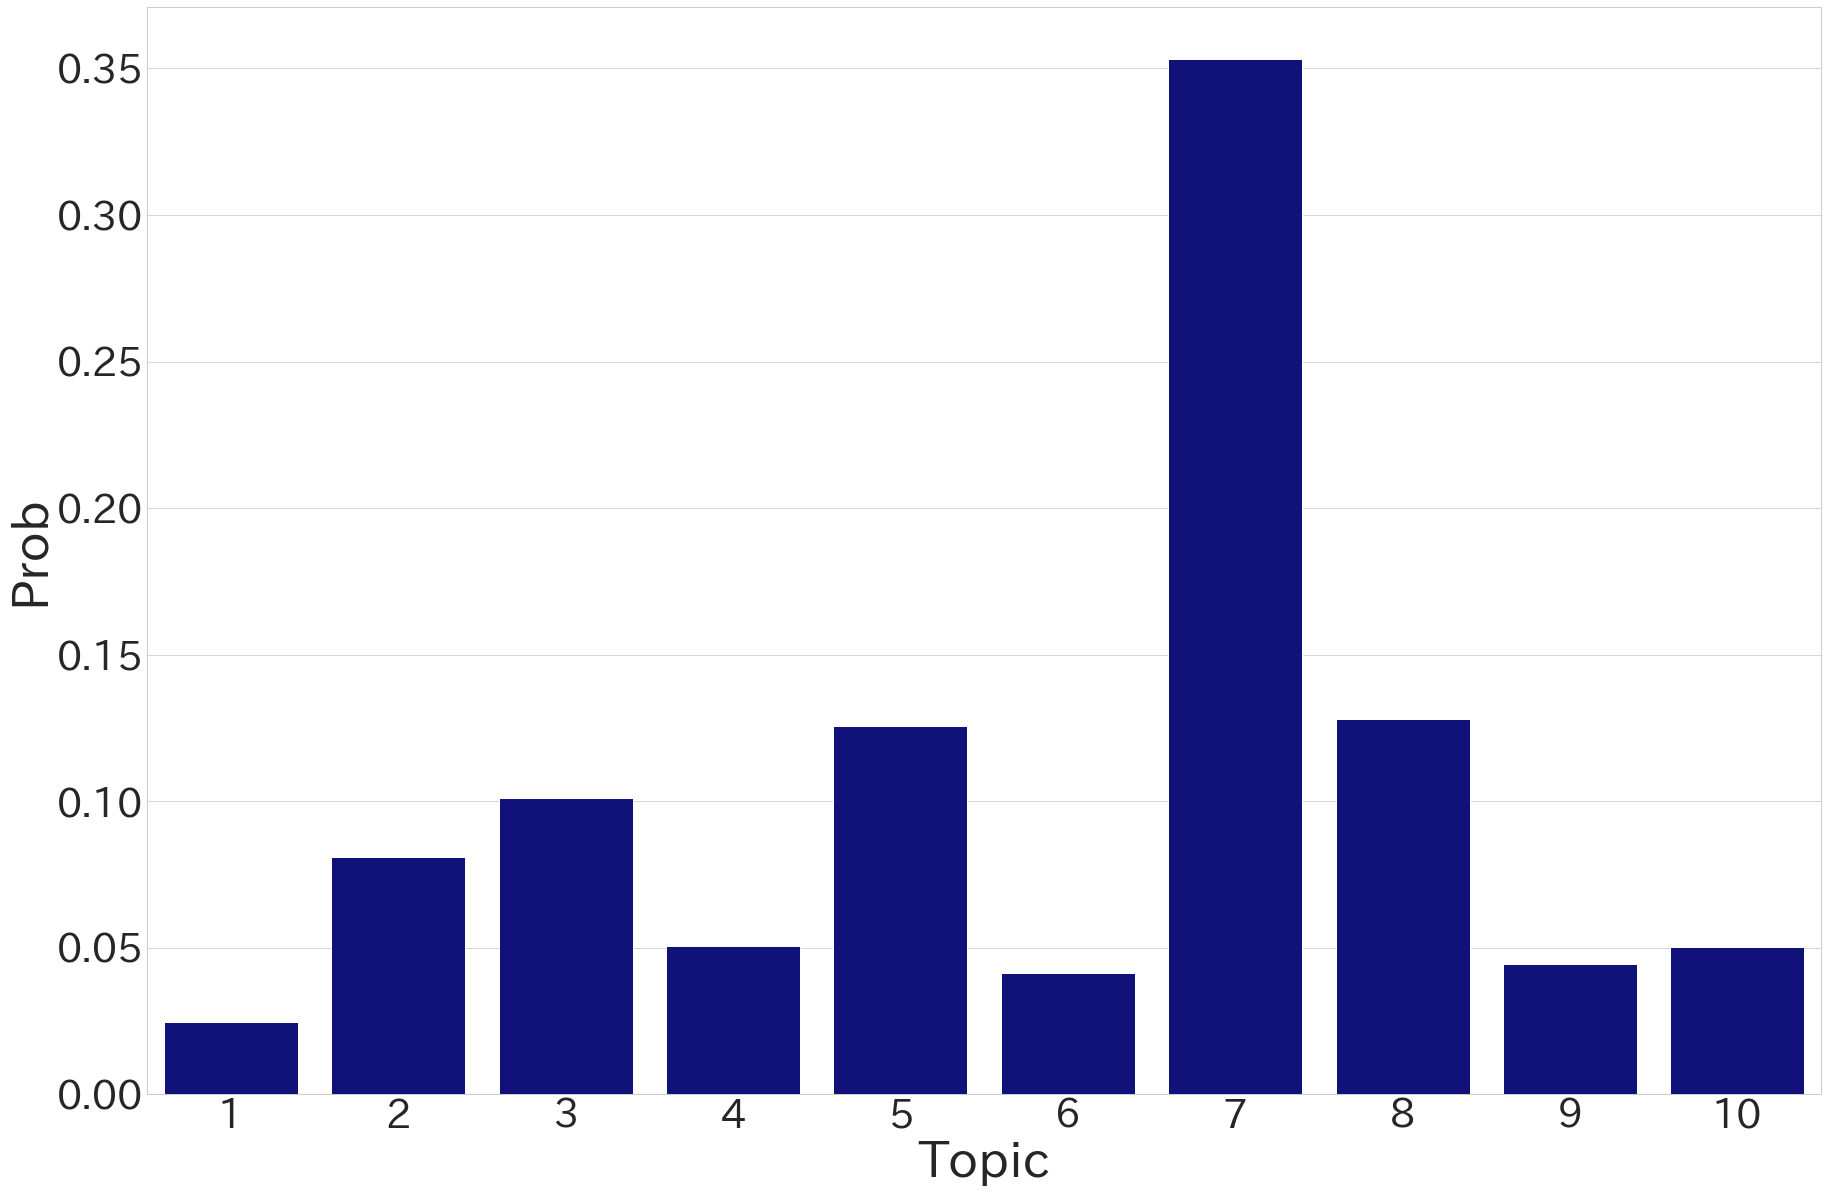

In [118]:
#Make Numpy b/w Products & topics
Prob_products=np.array(lda.get_document_topics(corpus,minimum_probability=0))[:,:,1]

#Put in DataFrame
L=[ z for z in range(1,zk+1)]
col_name=list(map(lambda x: "Prob_"+str(x),L))
df_prob=pd.DataFrame(Prob_products)
df_prob.columns=col_name

#Add product name & most likely belonging topic No.
df_prob["Max"]=df_prob.idxmax(axis=1)
def del_Prob(x):
    return int(x.split("_")[1])
df_prob["Max"]=df_prob["Max"].apply(lambda x : del_Prob(x))
df_prob.insert(0, "id", df_new_combined["id"])
display(df_prob.head(30))

#Calculate probability of apperance of each topic
df_topic=pd.DataFrame(df_prob.drop(["Max", "id"],axis=1).sum()/df_prob.drop(["Max", "id"],axis=1).sum().sum())
df_topic.columns=["Prob"]
df_topic["Topic"]=[ z for z in range(1,zk+1)]

#Visualization
plt.figure(figsize = (30,20))
ax= sns.barplot(x="Topic",y="Prob",data=df_topic,color="darkblue")
ax.set_xlabel("Topic",fontsize=50)
ax.set_ylabel("Prob",fontsize=50)
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
plt.show()

<Figure size 1512x864 with 0 Axes>

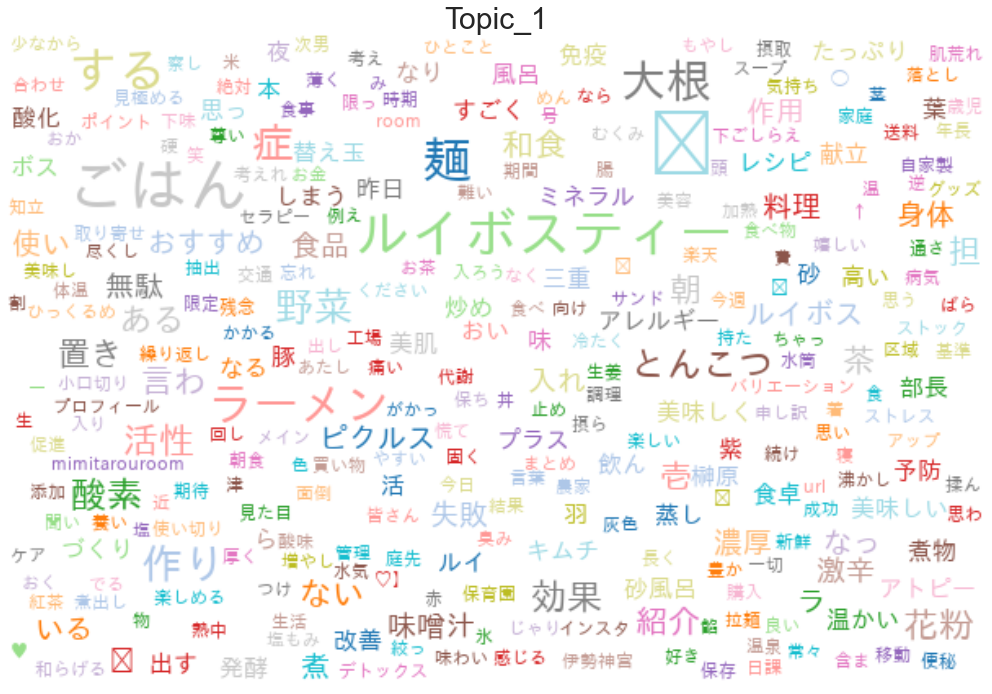

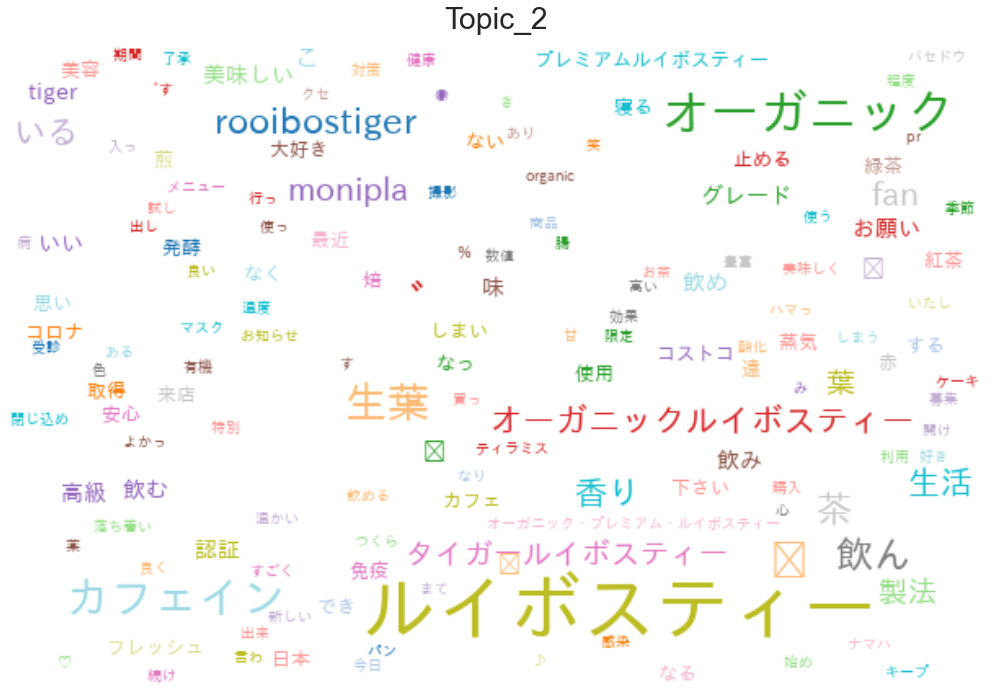

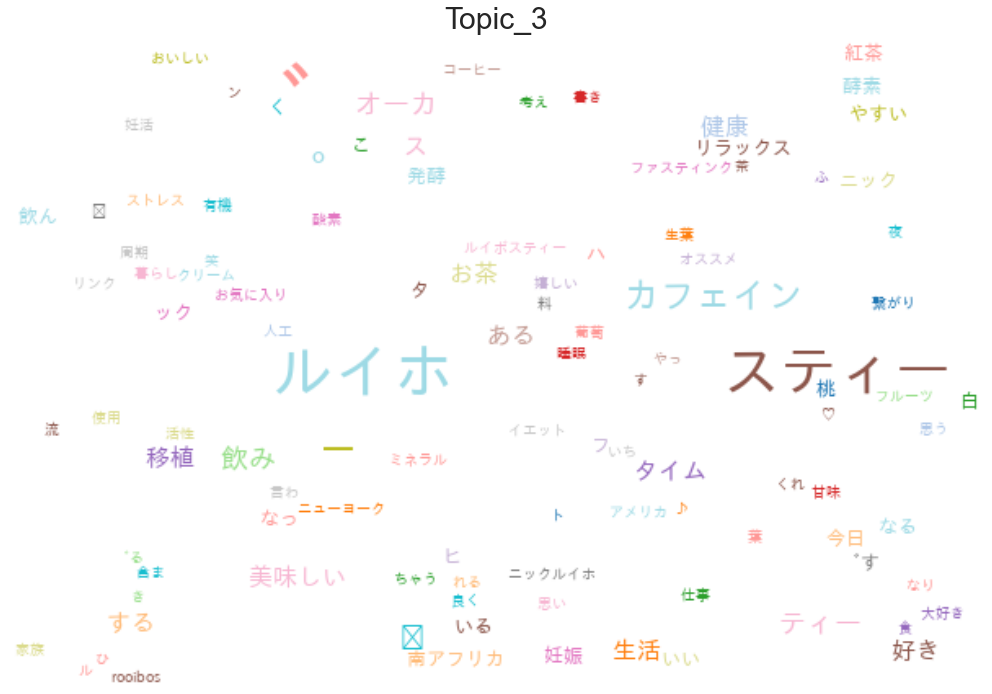

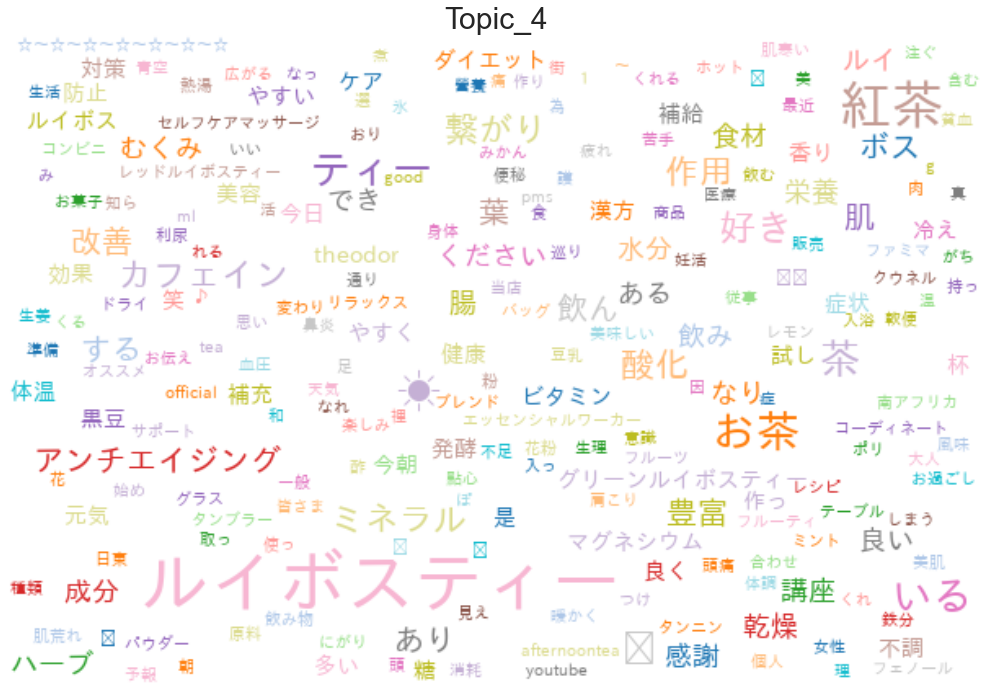

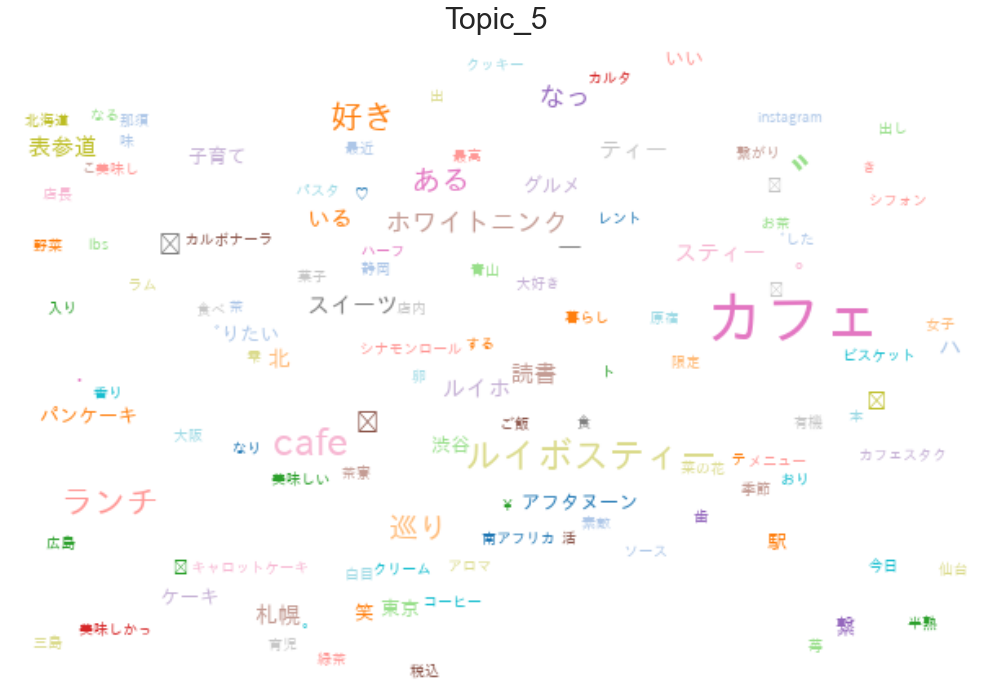

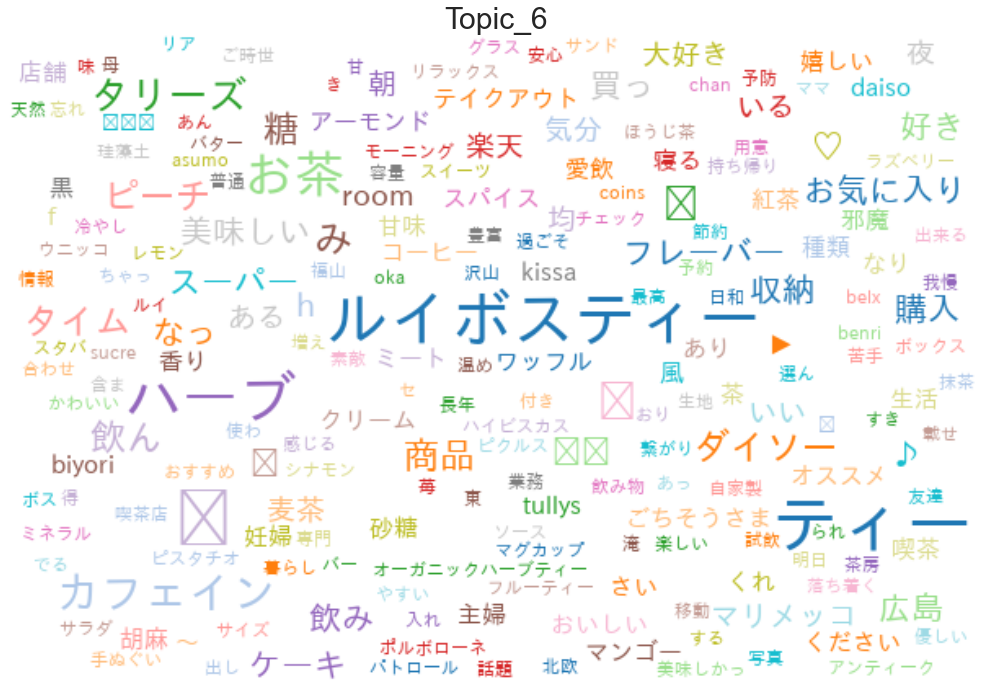

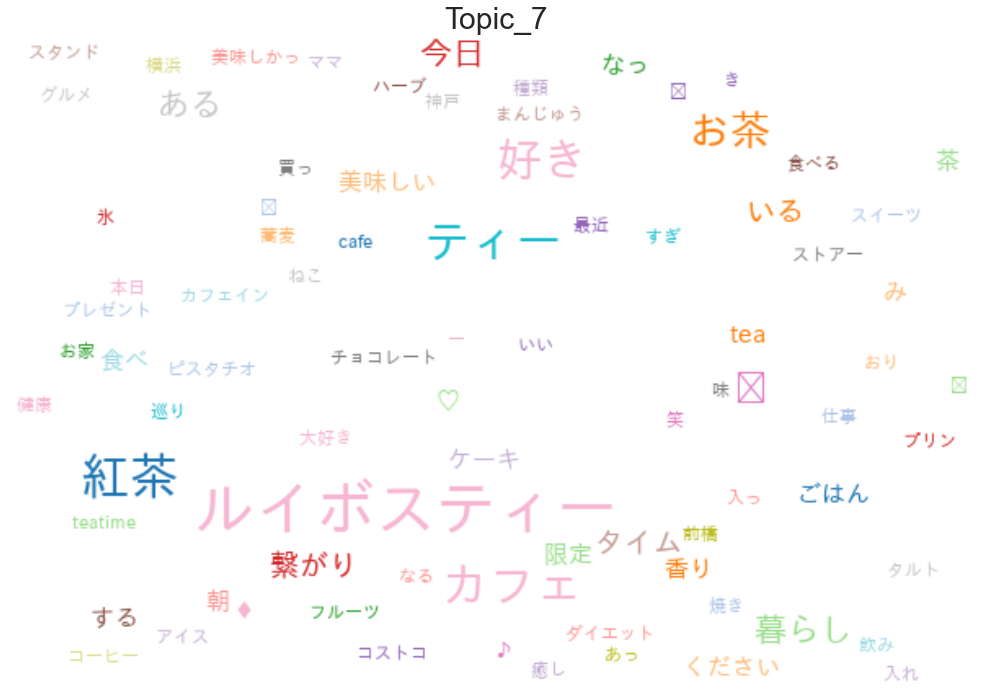

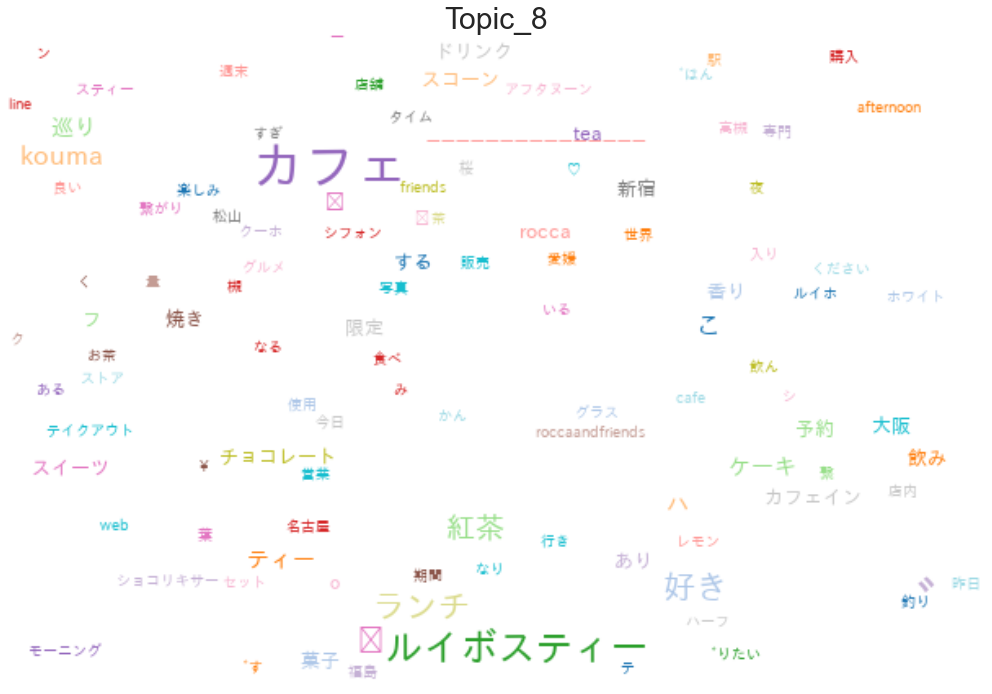

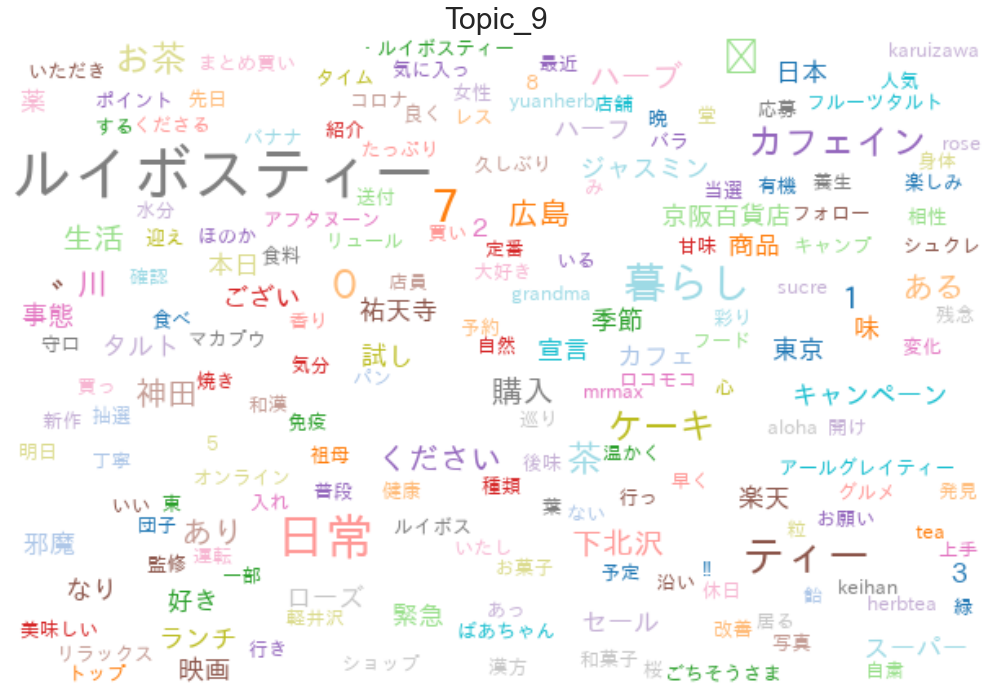

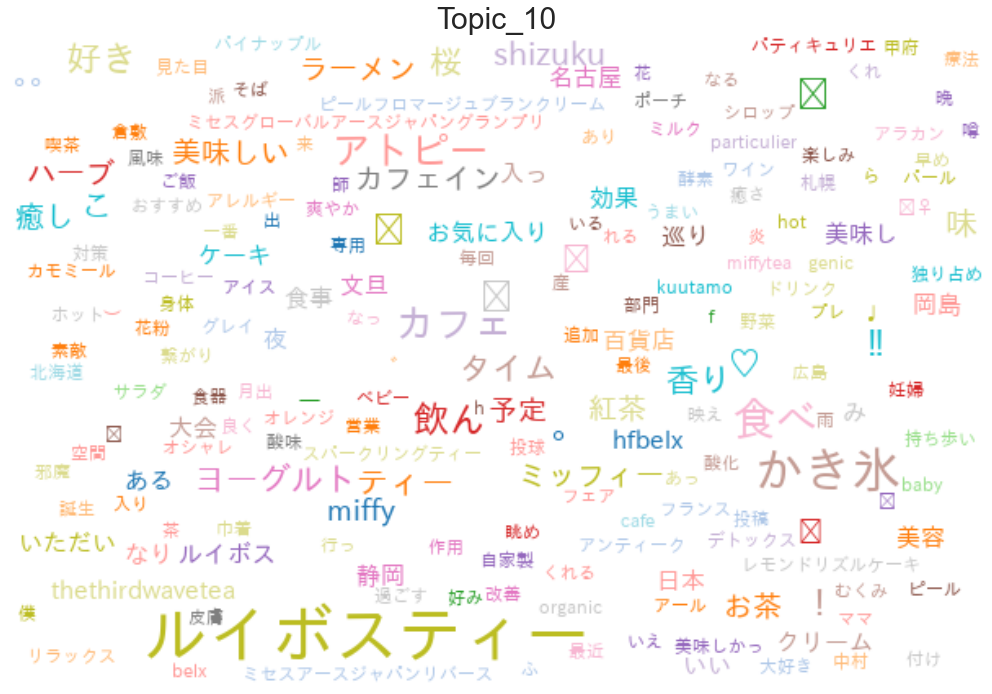

In [120]:
##Visualization of words

topic_word_prob=[]

for z in range(zk):
    word=[]
    prob=[]
    topic = lda.show_topic(z,1000) #No. of words

    for t in topic:
        word.append(t[0])
        prob.append(t[1])
        
    df_lda=pd.DataFrame({"word":word,"prob":prob})
    topic_word_prob.append(df_lda)

fig = plt.figure(figsize=(21, 12))

for z in range(zk):
    topic_text=[]
    for index, row in topic_word_prob[z].iloc[:2000,].iterrows():
        word=row["word"]
        weight=int(row["prob"]*1000)
        for _ in range(weight):
            topic_text.append(word)
            
    words = Counter(topic_text)
    wc_bz = WordCloud(background_color="white",
                      width=600, 
                      height=400, 
                      max_words=3000, 
                      max_font_size=70, 
                      font_path=fpath,
                      prefer_horizontal=1,
                      include_numbers=True,
                      colormap='tab20',
                      regexp=r"[\w']+")
    wc_bz.generate_from_frequencies(words)

    plt.figure(figsize = (21,12))
    sns.set_style("whitegrid")
    plt.title('Topic_{}'.format(z+1), fontsize=30)
    plt.imshow(wc_bz, interpolation='bilinear')
    plt.axis("off")
    
    # topic groups output to png
    output_dir = "/Users/motoki/PycharmProjects/motoki_ul/review_analysis/output_dir/instagram_mixed"
    pngname =  f"{today}_{category}_{zk}IGtopics"
    plt.savefig(f'{output_dir}/{pngname}_{z+1}.png')
    plt.show()

In [121]:
##Word2Vec Analysis
from gensim.models import word2vec

sent = text_combined
#Learning word2vec model
model = word2vec.Word2Vec(sent,
                          vector_size=50,  # Demention of vector (depends on the number of unique words)
                          min_count=3,  # Words appearing at least 2 times
                          window=5,  # Width of window
                          epochs=4000,  # Iter numbers of leaning
                          seed=2018 # Fix seed for generating stable random number
                         )

KeyboardInterrupt: 

In [46]:
word = "リプトン"
# Output the most similar words & similarity index
results = model.wv.most_similar(positive=word,topn=20)  
# Show in DataFrame
df_result = pd.DataFrame(results,columns=["Word","Sim"])
print("_{}_".format(word))
display(df_result.T)

_リプトン_


0         1         2         3         4         5         6   \
Word        トワ      イニング        含ま        毎年        酸味        一番      酸っぱい   
Sim   0.503478  0.489715  0.419873  0.326249  0.322715  0.315272  0.295669   

            7         8         9         10        11        12      13  \
Word     ジンジャー       ピーチ        綺麗        清涼       楽しみ       温かい     レモン   
Sim   0.295229  0.292815  0.283533  0.274624  0.273924  0.257834  0.2556   

            14        15        16        17        18        19  
Word        最近       はまっ        残念       温まり        向け        強い  
Sim   0.254127  0.248342  0.246455  0.243701  0.224303  0.221184

In [50]:
## Plus/Minus words and show the similarities
results = model.wv.most_similar(positive=[u"ルイボス",u"美味しい"], negative=[u"フルーツ"], topn=20)
df_result = pd.DataFrame(results,columns=["Word","Sim"])
display(df_result.T)

0         1         2         3         4         5         6   \
Word        子供   ルイボスティー        飲み       少なく         母       バニラ        健康   
Sim   0.491984  0.428961  0.363454  0.339553  0.327391  0.296987  0.286571   

            7         8         9         10        11       12        13  \
Word        なる         １       酸っぱ        入っ        いる   ルイボスティ       口コミ   
Sim   0.282587  0.280377  0.276089  0.261365  0.254071  0.25315  0.239916   

            14        15        16       17        18        19  
Word        でき        思い        水筒       種類        注ぐ        作る  
Sim   0.239635  0.230769  0.228517  0.21024  0.207163  0.206145

In [54]:
#Make array of mean vector b/w No. of products & vector dementions
product_vec = np.zeros((df_new_combined.shape[0],50))

for i,product in enumerate(text_combined):
    print(df_new_combined.id[i])
    feature_vec = np.zeros(50)
    num_words = 0
    for word in product:
        try:
            feature_vec += model.wv[word]
            num_words += 1
        except:
            print(f"{word}_is_not_in_dic")
    feature_vec = feature_vec / num_words  # Split sum of all the words vector
    product_vec[i] = feature_vec

##t-SNE for Word2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=500)
tsne_word2vec = tsne.fit_transform(product_vec)

DEAN&DELUCA（ディーンアンドデルーカ）　ティーセレクション　ハーバル&フレーバー　1箱（6個入）
LEBENSBAUM（レーベンスバウム） オーガニック 20種類のワールドトラベルアソートティー 1個（1.5g～2g×20袋） ハーブティー
LEBENSBAUM（レーベンスバウム） ヤノッシュシリーズ お試しセット ハーブティー
Wismettacフーズ　セレッシャル　スリーピータイム　1箱（20バッグ入）
Wismettacフーズ　セレッシャル　ハニーバニラカモミール　1箱（20バッグ入）
Wismettacフーズ　セレッシャル　ハーブ5種アソートセット　1箱（18バッグ入）
【 ハーブティー 】　フルーツガーデン ストロベリークリーム 1袋 125g ［ ノンカフェイン フルーツ入り ］
【 ハーブティー 】　フルーツガーデン ハワイカクテル 1袋 125g ［ ノンカフェイン フルーツ入り ］
【 ハーブティー 】　フルーツガーデン ブラッドオレンジ 1袋  125g ［ ノンカフェイン フルーツ入り ］
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー すっきりメロン 52504 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー めぐり苺 52500 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー ビタカシス 52502 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー ビタカシス 52502 50g×3個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー ビューティーイチジク 52506 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー 林檎はちみつシナモン 52510 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティーシャンピーチ 52512 50g1個
【アウトレット】セレッシャル オーガニック カモミールラベンダー 1箱（20バッグ入）
【アウトレット】フルーツガーデン フルーツパラダイス 1袋（125g）
【ノンカフェイン】　国太楼　ルイボスティー　1袋（10

x          y                                       product_name  \
0  15.421871 -32.642307  DEAN&DELUCA（ディーンアンドデルーカ）　ティーセレクション　ハーバル&フレーバー　...   
1  13.768413  24.291910  LEBENSBAUM（レーベンスバウム） オーガニック 20種類のワールドトラベルアソートテ...   
2  18.572802   5.938023       LEBENSBAUM（レーベンスバウム） ヤノッシュシリーズ お試しセット ハーブティー   
3  10.622675 -29.100092            Wismettacフーズ　セレッシャル　スリーピータイム　1箱（20バッグ入）   
4  13.246469   9.407538         Wismettacフーズ　セレッシャル　ハニーバニラカモミール　1箱（20バッグ入）   
5   4.146376  10.501554        Wismettacフーズ　セレッシャル　ハーブ5種アソートセット　1箱（18バッグ入）   
6  10.620839 -17.488949  【 ハーブティー 】　フルーツガーデン ストロベリークリーム 1袋 125g ［ ノンカフェ...   
7   4.419537 -22.490021  【 ハーブティー 】　フルーツガーデン ハワイカクテル 1袋 125g ［ ノンカフェイン ...   
8  28.651991 -12.408365  【 ハーブティー 】　フルーツガーデン ブラッドオレンジ 1袋  125g ［ ノンカフェイ...   
9 -25.450825 -30.221359  【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー すっきりメ...   

                    brand  
0               ディーン＆デルーカ  
1        SONNENTOR（ゾネントア）  
2    LEBENSBAUM（レーベンスバウム）  
3           セレッシャルシーズニングス  
4           セレッシャルシーズニングス  
5           セレッシャルシーズニングス  
6  Fruit Garden（フルーツガーデン）  
7  Fruit Garden（フルーツガーデン）  
8  Fruit Garden（フルーツガーデン）  
9    VECUA Honey（ベキュアハニー）

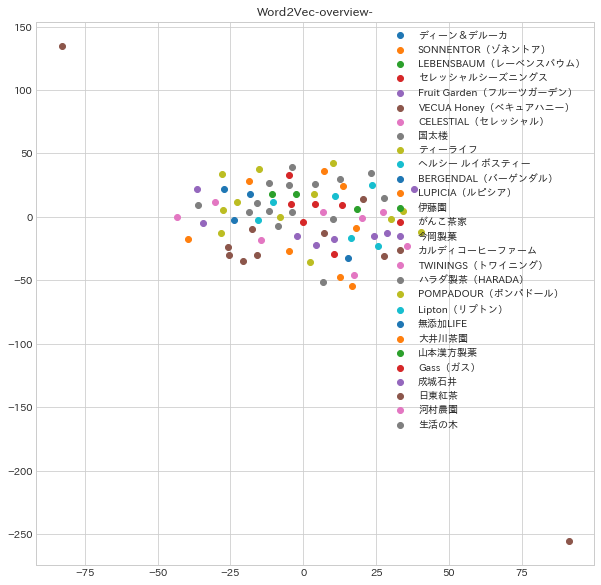

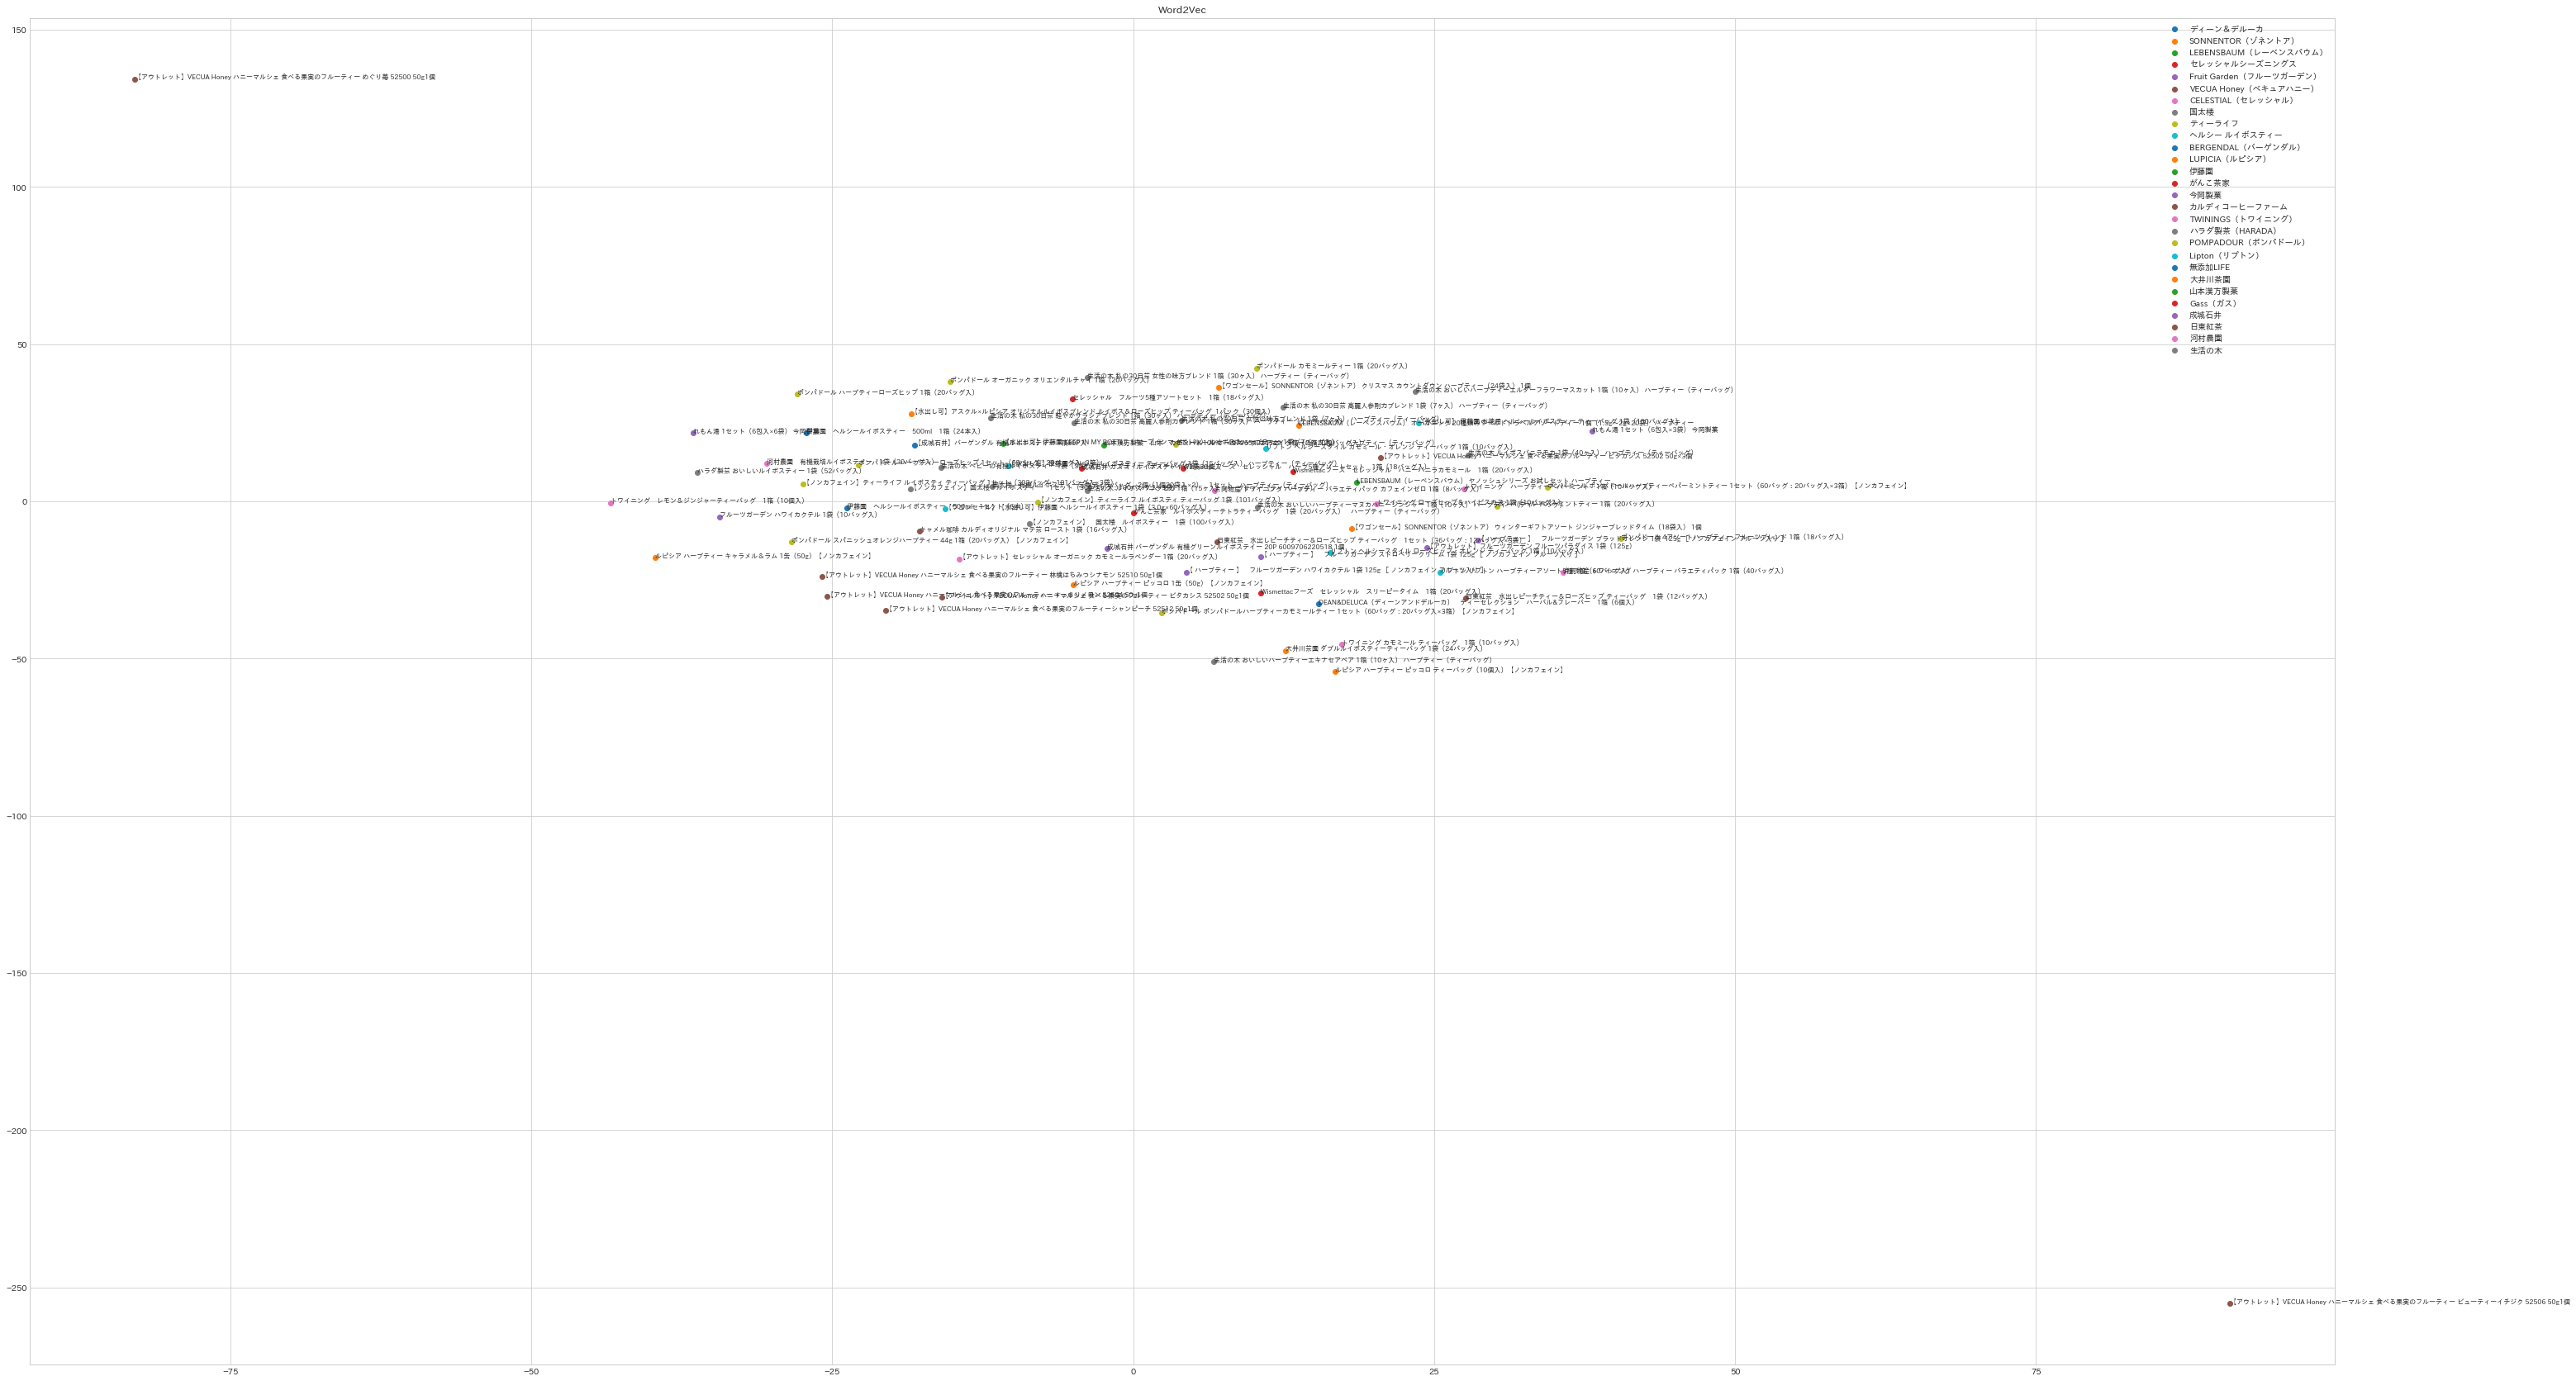

In [56]:
#Put in DataFrame
df_tsne_word2vec = pd.DataFrame(tsne_word2vec[:, 0],columns = ["x"])
df_tsne_word2vec["y"] = pd.DataFrame(tsne_word2vec[:, 1])
df_tsne_word2vec["id"] = df_new_combined.id
df_tsne_word2vec["hashtag"] = df_new_combined.hashtag

pd.set_option('display.max_rows', 1000)
display(df_tsne_word2vec.head(10))

##Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.family'] = 'IPAexGothic'

#A: Overlook
fig_overview_word2vec = plt.figure(figsize=(10.0, 10.0))
for f in df_tsne_word2vec['hashtag'].unique():
    plt.scatter(df_tsne_word2vec.loc[df_tsne_word2vec.hashtag == f ,'x'], df_tsne_word2vec.loc[df_tsne_word2vec.hashtag == f ,'y'], label=f)

plt.legend()
plt.title("Word2Vec-overview-")

#B: Detail
fig_detail_word2vec = plt.figure(figsize=(50.0, 30.0))
for f in df_tsne_word2vec['hashtag'].unique():
    plt.scatter(df_tsne_word2vec.loc[df_tsne_word2vec.hashtag == f ,'x'], df_tsne_word2vec.loc[df_tsne_word2vec.hashtag == f ,'y'], label=f)

for i, txt in enumerate(df_tsne_word2vec["id"].values):
    plt.annotate(txt, (df_tsne_word2vec["x"].values[i], df_tsne_word2vec["y"].values[i]), fontsize=8)
    
plt.legend()
plt.title("Word2Vec")

plt.show()

In [47]:
##Doc2Vec analysis

from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim import corpora, models

trainings_combined = [TaggedDocument(words=data, tags=[name]) for (name, data) in zip(df_new_combined["id"], text_combined)]

# Learning model
model_doc_combined = models.Doc2Vec(
    documents=trainings_combined,
    vector_size=50,
    min_count=2,
    epochs=4000
)

In [58]:
word = "リプトン"
# Output the most similar words & similarity index
results = model_doc_combined.wv.most_similar(positive=word,topn=20)  
# Show in DataFrame
df_result = pd.DataFrame(results,columns=["Word","Sim"])
print("_{}_".format(word))
display(df_result.T)

_リプトン_


0         1        2         3        4         5         6   \
Word        トワ       温かい     イニング        一番     気に入っ        綺麗        購入   
Sim   0.535167  0.441997  0.42409  0.359616  0.35638  0.355789  0.332568   

           7         8         9         10        11        12        13  \
Word       思い       安かっ        癒さ        毎年        異国        効い      美味しく   
Sim   0.31348  0.302193  0.300955  0.299515  0.297638  0.291877  0.284169   

           14        15       16        17        18        19  
Word        母        濃く        ０      かわいい        向け        暑い  
Sim   0.28322  0.278115  0.27741  0.259111  0.250586  0.249902

In [59]:
## Plus/Minus words and show the similarities
results = model_doc_combined.wv.most_similar(positive=[u"リプトン",u"安い"], negative=[u"フルーツ"], topn=20)
df_result = pd.DataFrame(results,columns=["Word","Sim"])
display(df_result.T)

0         1         2         3         4         5         6   \
Word        香り        トワ        コス        癒さ        毎年      気に入っ        綺麗   
Sim   0.372038  0.358927  0.339417  0.338398  0.334616  0.324355  0.319897   

            7         8         9         10        11        12        13  \
Word        思い        定期        安心        購入        向け       はまっ        飲む   
Sim   0.317904  0.307789  0.302372  0.288592  0.288399  0.281103  0.277634   

            14       15        16        17       18        19  
Word      イニング    パッケージ        でる        感想       お茶         母  
Sim   0.275786  0.27345  0.260004  0.258803  0.25166  0.251638

In [61]:
## Find similar items(documents)
results = model_doc_combined.docvecs.most_similar(positive="リプトン ヘルシースタイル カモミール・オレンジ ティーバッグ 1箱（10バッグ入）")
df_result = pd.DataFrame(results,columns=["Word","Sim"])
display(df_result.T)

<ipython-input-61-b771ea8573ae>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  results = model_doc_combined.docvecs.most_similar(positive="リプトン ヘルシースタイル カモミール・オレンジ ティーバッグ 1箱（10バッグ入）")


0                               1  \
Word  ポンパドール カモミールティー 1箱（20バッグ入）  伊藤園　ヘルシールイボスティー　500ml　1箱（24本入）   
Sim                      0.54276                        0.501323   

                                              2  \
Word  ポンパドール ハーブティーローズヒップ 1セット（60バッグ：20バッグ入×3箱）   
Sim                                    0.492985   

                                                      3  \
Word  山本漢方製薬　山本　カモミール100%　4979654024549　1箱（2g×20包）　ハ...   
Sim                                             0.47014   

                                                  4  \
Word  生活の木 私の30日茶 女性の味方ブレンド 1箱（30ヶ入） ハーブティー（ティーバッグ）   
Sim                                         0.45922   

                                                      5  \
Word  【 ハーブティー 】　フルーツガーデン ブラッドオレンジ 1袋  125g ［ ノンカフェイ...   
Sim                                             0.45398   

                                          6  \
Word  ルピシア ハーブティー キャラメル＆ラム 1缶（50g）【ノンカフェイン】   
Sim                                 0.45277   

                                                   7  \
Word  生活の木 私の30日茶 高麗人参剛力ブレンド 1箱（30ヶ入） ハーブティー（ティーバッグ）   
Sim                                         0.448062   

                                           8  \
Word  生活の木 ルイボスバニラモカ 1袋（40ヶ入） ハーブティー（ティーバッグ）   
Sim                                 0.440716   

                                                      9  
Word  ポンパドール ポンパドールハーブティーカモミールティー 1セット（60バッグ：20バッグ入×...  
Sim                                            0.436387

In [48]:
#Make array of mean vector b/w No. of products & vector dementions
product_vec_doc = np.zeros((df_new_combined.shape[0],50))

for i,product in enumerate(text_combined):
    print(df_new_combined.id[i])
    feature_vec_doc = np.zeros(50)
    num_words_doc = 0
    for word in product:
        try:
            feature_vec_doc += model_doc_combined.wv[word]
            num_words_doc += 1
        except:
            print(f"{word}_is_not_in_dic")
    feature_vec_doc = feature_vec_doc / num_words_doc  # Split sum of all the words vector
    product_vec_doc[i] = feature_vec_doc

##t-SNE for Doc2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=500)
tsne_doc2vec = tsne.fit_transform(product_vec_doc)

DEAN&DELUCA（ディーンアンドデルーカ）　ティーセレクション　ハーバル&フレーバー　1箱（6個入）
LEBENSBAUM（レーベンスバウム） オーガニック 20種類のワールドトラベルアソートティー 1個（1.5g～2g×20袋） ハーブティー
LEBENSBAUM（レーベンスバウム） ヤノッシュシリーズ お試しセット ハーブティー
Wismettacフーズ　セレッシャル　スリーピータイム　1箱（20バッグ入）
Wismettacフーズ　セレッシャル　ハニーバニラカモミール　1箱（20バッグ入）
Wismettacフーズ　セレッシャル　ハーブ5種アソートセット　1箱（18バッグ入）
【 ハーブティー 】　フルーツガーデン ストロベリークリーム 1袋 125g ［ ノンカフェイン フルーツ入り ］
【 ハーブティー 】　フルーツガーデン ハワイカクテル 1袋 125g ［ ノンカフェイン フルーツ入り ］
【 ハーブティー 】　フルーツガーデン ブラッドオレンジ 1袋  125g ［ ノンカフェイン フルーツ入り ］
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー すっきりメロン 52504 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー めぐり苺 52500 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー ビタカシス 52502 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー ビタカシス 52502 50g×3個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー ビューティーイチジク 52506 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー 林檎はちみつシナモン 52510 50g1個
【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティーシャンピーチ 52512 50g1個
【アウトレット】セレッシャル オーガニック カモミールラベンダー 1箱（20バッグ入）
【アウトレット】フルーツガーデン フルーツパラダイス 1袋（125g）
【ノンカフェイン】　国太楼　ルイボスティー　1袋（10

x          y                                       product_name  \
0 -45.109653  79.046638  DEAN&DELUCA（ディーンアンドデルーカ）　ティーセレクション　ハーバル&フレーバー　...   
1  12.106108   1.592252  LEBENSBAUM（レーベンスバウム） オーガニック 20種類のワールドトラベルアソートテ...   
2  17.036133  11.622809       LEBENSBAUM（レーベンスバウム） ヤノッシュシリーズ お試しセット ハーブティー   
3  24.627947  22.885389            Wismettacフーズ　セレッシャル　スリーピータイム　1箱（20バッグ入）   
4   2.782181  10.985058         Wismettacフーズ　セレッシャル　ハニーバニラカモミール　1箱（20バッグ入）   
5  -8.521563 -69.922462        Wismettacフーズ　セレッシャル　ハーブ5種アソートセット　1箱（18バッグ入）   
6 -37.420597   3.177659  【 ハーブティー 】　フルーツガーデン ストロベリークリーム 1袋 125g ［ ノンカフェ...   
7  87.071495  38.387630  【 ハーブティー 】　フルーツガーデン ハワイカクテル 1袋 125g ［ ノンカフェイン ...   
8 -68.426849  27.638330  【 ハーブティー 】　フルーツガーデン ブラッドオレンジ 1袋  125g ［ ノンカフェイ...   
9  51.686825 -58.242813  【アウトレット】VECUA Honey ハニーマルシェ 食べる果実のフルーティー すっきりメ...   

                    brand  
0               ディーン＆デルーカ  
1        SONNENTOR（ゾネントア）  
2    LEBENSBAUM（レーベンスバウム）  
3           セレッシャルシーズニングス  
4           セレッシャルシーズニングス  
5           セレッシャルシーズニングス  
6  Fruit Garden（フルーツガーデン）  
7  Fruit Garden（フルーツガーデン）  
8  Fruit Garden（フルーツガーデン）  
9    VECUA Honey（ベキュアハニー）

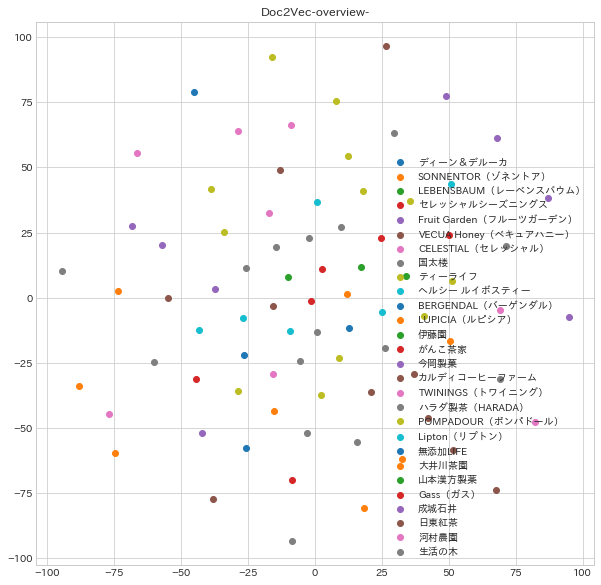

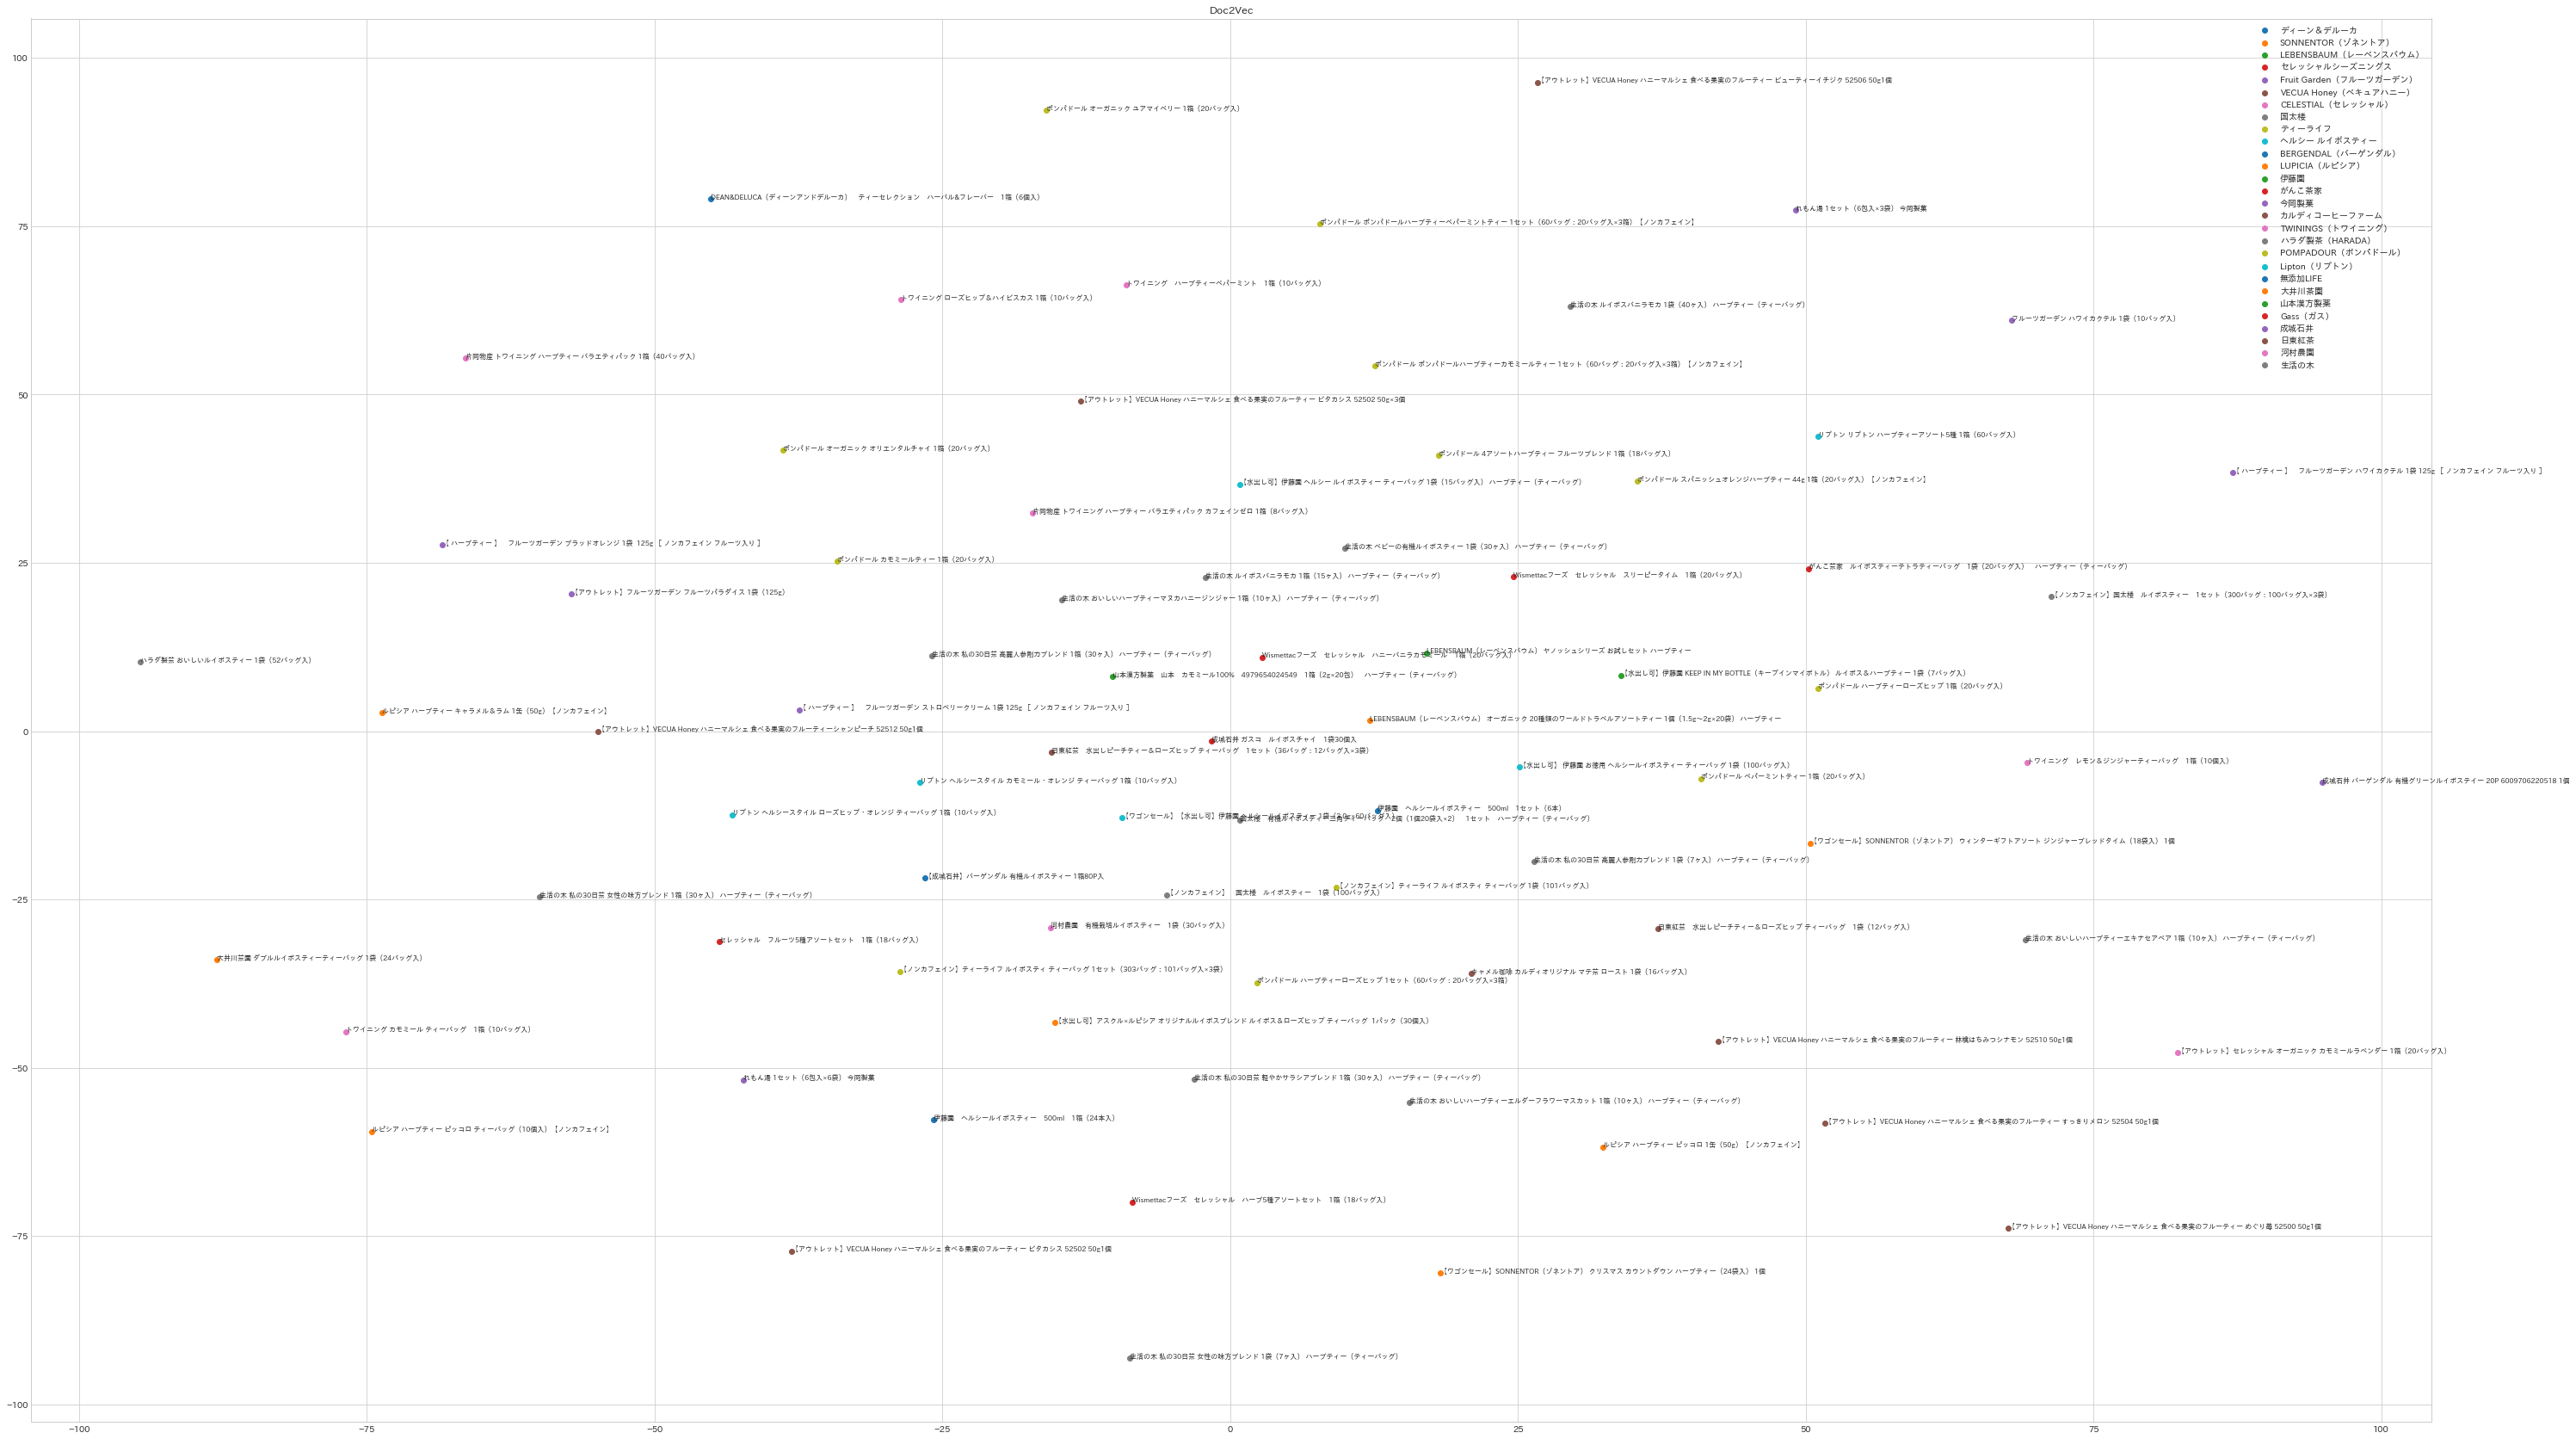

In [62]:
#Put in DataFrame
df_tsne_doc2vec = pd.DataFrame(tsne_doc2vec[:, 0],columns = ["x"])
df_tsne_doc2vec["y"] = pd.DataFrame(tsne_doc2vec[:, 1])
df_tsne_doc2vec["id"] = df_new_combined.id
df_tsne_doc2vec["hashtag"] = df_new_combined.hashtag

pd.set_option('display.max_rows', 1000)
display(df_tsne_doc2vec.head(10))

##Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.family'] = 'IPAexGothic'

#A: Overlook
fig_overview_doc2vec = plt.figure(figsize=(10.0, 10.0))
for f in df_tsne_doc2vec['hashtag'].unique():
    plt.scatter(df_tsne_doc2vec.loc[df_tsne_doc2vec.hashtag == f ,'x'], df_tsne_doc2vec.loc[df_tsne_doc2vec.hashtag == f ,'y'], label=f)

plt.legend()
plt.title("Doc2Vec-overview-")

#B: Detail
fig_detail_doc2vec = plt.figure(figsize=(50.0, 30.0))
for f in df_tsne_doc2vec['hashtag'].unique():
    plt.scatter(df_tsne_doc2vec.loc[df_tsne_doc2vec.hashtag == f ,'x'], df_tsne_doc2vec.loc[df_tsne_doc2vec.hashtag == f ,'y'], label=f)

for i, txt in enumerate(df_tsne_doc2vec["id"].values):
    plt.annotate(txt, (df_tsne_doc2vec["x"].values[i], df_tsne_doc2vec["y"].values[i]), fontsize=8)
    
plt.legend()
plt.title("Doc2Vec")

plt.show()